# GROUP ASSIGNMENT - RMBA-2771 Fall 2025

Date: 23.09.2025 

Course: 2771 Research Methods for Business Analytics 

Instructor: Daniel Obermeier

Group: TXB B18

Henrik Peuker 72636

### Table of content

Select the hyperlink to go to the respective section

- [1 Executive Summary](#1-executive-summary)
- [2 Introduction](#2-introduction)
- [3 Exploratory Analyis](#3-exploratory-analysis)
  - [3.1 Types of variables](#31-types-of-variables)
  - [3.2 Descriptive statistics ](#32-descriptive-statistics)
- [4 Method 1: Linear Regression](#4-method-1-linear-regression)
  - [4.1 Model 1](#41-model-1)
  - [4.2 Model 1 Assumptions](#42-model-1-assumptions)
    - [Linearity](#421-linearity)
    - [Homoscedasticity](#422-homoscedasticity)
    - [Normality of residuals](#423-normality-of-residuals)
    - [Multicollinearity](#424-multicollinearity)
    - [Independence of Errors](#425-independence-of-errors-autocorrelation-of-errors)
    - [Conclusion](#426-conclusion)
  - [4.3 Model 2: Log](#43-model-2-log)
  - [4.4 Model 2 Assumptions](#44-model-2-assumptions)
    - [Linearity](#441-linearity)
    - [Homoscedasticity](#442-homoscedasticity)
    - [Normality of residuals](#443-normality-of-residuals)
    - [Multicollinearity](#444-multicollinearity)
    - [Independence of Errors](#445-independence-of-errors-autocorrelation-of-errors)
    - [Conclusion](#446-conclusion)
- [5 Method 2](#5-method-2)
  - [5.1 Creating the model](#51-creating-the-model)
  - [5.2 Interpreting the outcome](#52-interpreting-the-outcome)
    - [5.2.1 Goodness-of-fit](#521-goodness-of-fit)
    - [5.2.2 Hypothesis testing](#522-hypothesis-testing)
    - [5.2.3 Odds ration](#523-odds-ratio)
- [6 Reflection on the use of AI](#6-reflection-on-the-use-of-ai)
- [7 Conclusion](#7-conclusion)


# 1. Executive Summary

# 2. Introduction

The data set "HR-Employee-Attrition" includes individual records of employees. Each row represents an individual employee, while the columns capture several demographic, educational, job-related and performance-related attributes. One of the main variables is Attrition, which shos if an employee has left the company. Attrition is recorded as a binary variable. 
The dataset includes variables such as age, gender, marital status, education level, job satisfaction, income. There is a mix of categorical, ordinal and numeric types which allows for a detailed analysis. 

When looking at the data set we have identified a novel, relevant and interesting research question regarding monthly income. **To what extent do different job characteristics affect monthly income among employees?**

After refining the research question, job characteristics was separated into individual parts. Job characteristics might include travel frequency, satisfaction measures and working hours. 

According to previous scientific research the effect of team incentives on team performance increases when the team experiences more social cohesion. For this reason, we believe that travel frequency, especially when travelling with the team has a positive effect on performance and therefore also wages (Josse Delfgaauw et al., 2020). A recent study by SAP found that 85% are willing to spend personal money for better travel experiences (Kent, 2025). Under this assumptions it is valid to assume that business travel brings certain advantages such as higher monthly income. 

Which led to the following two hypothesis: H1: Controlling for demographics, education, performance and role, travel frequency have a positive effect on monthly income? 

To analyse the effect a ordinary least squares linear regression model was used. In order to create an identical person we included control metrics such as demographics, education, performance and role. 

Additionally, we came up with a second research question. 



In [55]:
#importing all necessary libraries

#Data handling 
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Statistical analysis
%pip install statsmodels
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
from scipy.stats import skew 
from scipy.stats import kurtosis 
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import levene


Note: you may need to restart the kernel to use updated packages.


# 3. Exploratory Analysis

Before we can start thinking about what we want to test and what statistical models might provide interesting insights, we start with exploratory data analysis. This step is not only about understand the variables and their distribution but also about assessing the quality of the data. 

We proceed as followed: 
- 3.1 Types of variables 
- 3.2 Descriptive statistics 
- 3.3 Descriptive statistics of correlations


## 3.1 Types of variables

In [56]:
# Importing the data set and assigning it to the varible df 
df= pd.read_csv("HR-Employee-Attrition.csv")

In [57]:
# Creating a summary table to see the number of variables and their types. Assigning the title "variable" to the first column and "Type" to the second column for better understanding.
summary_df = pd.DataFrame({
    "Variable": df.columns,
    "Type": [df[col].dtype.name for col in df.columns],
})

# Showing the summary with the index 
print(summary_df.to_string(index=True))



                    Variable    Type
0                        Age   int64
1                  Attrition  object
2             BusinessTravel  object
3                  DailyRate   int64
4                 Department  object
5           DistanceFromHome   int64
6                  Education   int64
7             EducationField  object
8              EmployeeCount   int64
9             EmployeeNumber   int64
10   EnvironmentSatisfaction   int64
11                    Gender  object
12                HourlyRate   int64
13            JobInvolvement   int64
14                  JobLevel   int64
15                   JobRole  object
16           JobSatisfaction   int64
17             MaritalStatus  object
18             MonthlyIncome   int64
19               MonthlyRate   int64
20        NumCompaniesWorked   int64
21                    Over18  object
22                  OverTime  object
23         PercentSalaryHike   int64
24         PerformanceRating   int64
25  RelationshipSatisfaction   int64
2

In [58]:
#Looking at the first 20 rows to get a better understading of the data and detect some patterns and anomalies. 
pd.set_option('display.max_columns', None)
print(df.head(20))

    Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Tr

In [59]:
#Selecting specific columns to see their unique values. We only selected non-continuous such as  categorical and discrete numerical variables to see the unique values they can take .
cat_cols = [    "BusinessTravel", "Department", "BusinessTravel", "Education", "EducationField",
    "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobLevel", "JobRole",
    "JobSatisfaction", "MaritalStatus", "Over18", "OverTime",
    "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "WorkLifeBalance"
]

# Print unique values for each selected column
for col in cat_cols:
    if col in df.columns:
        unique_vals = df[col].dropna().unique()
        print(f"\n {col}")
        print(unique_vals)


 BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 Department
['Sales' 'Research & Development' 'Human Resources']

 BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 Education
[2 1 4 3 5]

 EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

 EnvironmentSatisfaction
[2 3 4 1]

 Gender
['Female' 'Male']

 JobInvolvement
[3 2 4 1]

 JobLevel
[2 1 3 4 5]

 JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

 JobSatisfaction
[4 2 3 1]

 MaritalStatus
['Single' 'Married' 'Divorced']

 Over18
['Y']

 OverTime
['Yes' 'No']

 PerformanceRating
[3 4]

 RelationshipSatisfaction
[1 4 2 3]

 StandardHours
[80]

 WorkLifeBalance
[1 3 2 4]


#### Variable Description

The output shows what unique values a few of the non-continuous variables have. This allows us to understand the different categories of categorical variables. 

The following variables are included in the data set: 

- **age**: Employee age  
- **attrition**: Whether the employee has left the company (Yes = left, No = stayed)  

- **gender**: Employee gender (Male, Female)  
- **department**: Department of employment (Sales, Research & Development, Human Resources)  
- **jobRole**: Specific job title (e.g., Sales Executive, Research Scientist, Manager)  
- **businessTravel**: Frequency of business travel (Non-Travel, Travel_Rarely, Travel_Frequently)  
- **education**: Education level (1 = Below College, 2 = College, 3 = Bachelor, 4 = Master, 5 = Doctor)  
- **educationField**: Field of study (Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other)  
- **maritalStatus**: Marital status (Single, Married, Divorced)  
- **overTime**: Whether the employee works overtime (Yes, No)  

- **monthlyIncome**: Monthly income 
- **dailyRate**: Daily wage rate 
- **hourlyRate**: Hourly wage rate 
- **monthlyRate**: Monthly wage rate i
- **percentSalaryHike**: Percentage increase in salary from previous year  
- **performanceRating**: Performance rating (1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding)  

- **jobSatisfaction**: Satisfaction with the job (1 = Low, 2 = Medium, 3 = High, 4 = Very High)  
- **environmentSatisfaction**: Satisfaction with the work environment (1 = Low, 2 = Medium, 3 = High, 4 = Very High)  
- **relationshipSatisfaction**: Satisfaction with workplace relationships (1 = Low, 2 = Medium, 3 = High, 4 = Very High)  
- **workLifeBalance**: Work-life balance rating (1 = Bad, 2 = Good, 3 = Better, 4 = Best)  
- **trainingTimesLastYear**: Number of training sessions attended last year  

- **totalWorkingYears**: Total years of professional experience  
- **yearsAtCompany**: Years spent at the current company  
- **yearsInCurrentRole**: Years spent in the current role  
- **yearsSinceLastPromotion**: Years since last promotion  
- **yearsWithCurrManager**: Years working with current manager  
- **numCompaniesWorked**: Number of companies the employee has worked for  

- **stockOptionLevel**: Stock option level (0 = None, up to 3 = High)  
- **jobInvolvement**: Level of job involvement (1 = Low, 2 = Medium, 3 = High, 4 = Very High)  
- **employeeNumber**: Unique employee identifier  
- **employeeCount**: Constant value  
- **standardHours**: Standard working hours  
- **over18**: Whether the employee is over 18 


## 3.2 Descriptive statistics

In [60]:
# Checking for missing values in each column by looping and printing the number of missing values for each column.
for col in df.columns:
    missing = df[col].isna().sum()
    print(f"{col:<30}: {missing} missing value(s)")

Age                           : 0 missing value(s)
Attrition                     : 0 missing value(s)
BusinessTravel                : 0 missing value(s)
DailyRate                     : 0 missing value(s)
Department                    : 0 missing value(s)
DistanceFromHome              : 0 missing value(s)
Education                     : 0 missing value(s)
EducationField                : 0 missing value(s)
EmployeeCount                 : 0 missing value(s)
EmployeeNumber                : 0 missing value(s)
EnvironmentSatisfaction       : 0 missing value(s)
Gender                        : 0 missing value(s)
HourlyRate                    : 0 missing value(s)
JobInvolvement                : 0 missing value(s)
JobLevel                      : 0 missing value(s)
JobRole                       : 0 missing value(s)
JobSatisfaction               : 0 missing value(s)
MaritalStatus                 : 0 missing value(s)
MonthlyIncome                 : 0 missing value(s)
MonthlyRate                   :

The output shows that there are no missing values in any of the columns which is a sign of appropriate data quality. 

### Descriptive statistics - Categorical Data

In [61]:
# Select the important categorical columns for frequency tables.


# Create frequency tables showing absolute and relative frequencies for each categorical variable.
for col in cat_cols:
    freq = df[col].value_counts()
    rel_freq = df[col].value_counts(normalize=True) * 100
    freq_table = pd.DataFrame({
        "Absolute Frequency": freq,
        "Relative Frequency (%)": rel_freq.round(2)
    })
    print(f"\n{col} — Frequency Table")
    print(freq_table)


BusinessTravel — Frequency Table
                   Absolute Frequency  Relative Frequency (%)
BusinessTravel                                               
Travel_Rarely                    1043                   70.95
Travel_Frequently                 277                   18.84
Non-Travel                        150                   10.20

Department — Frequency Table
                        Absolute Frequency  Relative Frequency (%)
Department                                                        
Research & Development                 961                   65.37
Sales                                  446                   30.34
Human Resources                         63                    4.29

BusinessTravel — Frequency Table
                   Absolute Frequency  Relative Frequency (%)
BusinessTravel                                               
Travel_Rarely                    1043                   70.95
Travel_Frequently                 277                   18.84
Non-Trave

The output shows the absolute and relative frequency of the categorical variables. Particularly interesting to see is that 16.12 % have left the company as shown by the "Attrition" variable. Also interesting is that the company complies with laws regarding child labour. All employees are over 18 years old. Since we are interested in JobRole, BusinessTravel, Age and Gender  as categorical variables for the first hypothesis we will have a closer look ath those.

**JobRole**: The dataset contains 326 Sales Executives which is the largest share of employees with about 22.2%. There are about 102 Managers which respresents 6.9% of all employees. 

**BusinessTravel**: About 1043 employees travel rarely which corresponds with 71% of all employees, only 277 travel frequently which is about 18.85 of all employees. The remainder does not travel. 

**Gender**: In terms of gender 60% of employees are male while 40% are female. 


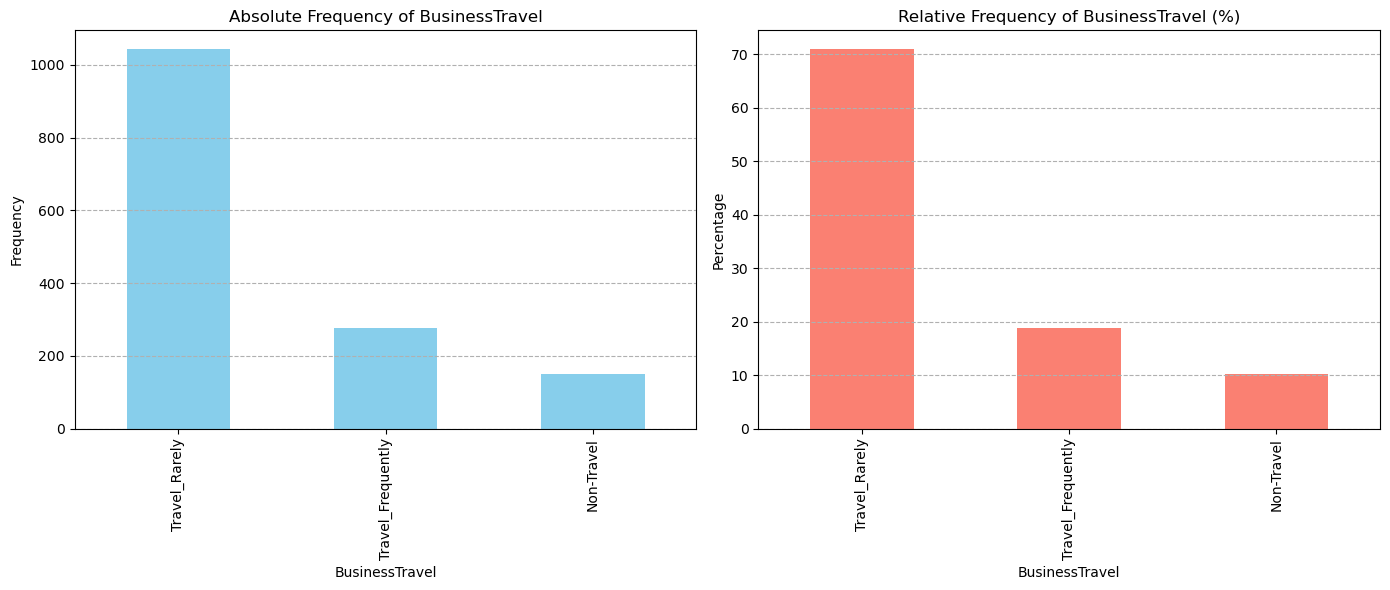

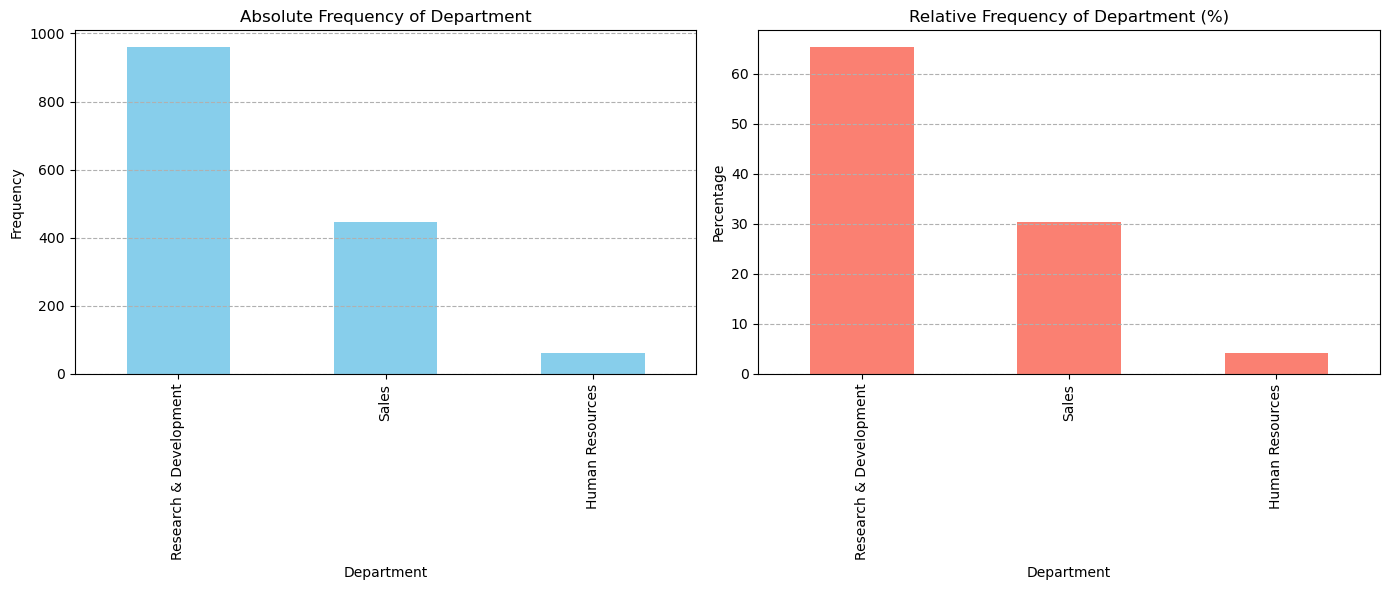

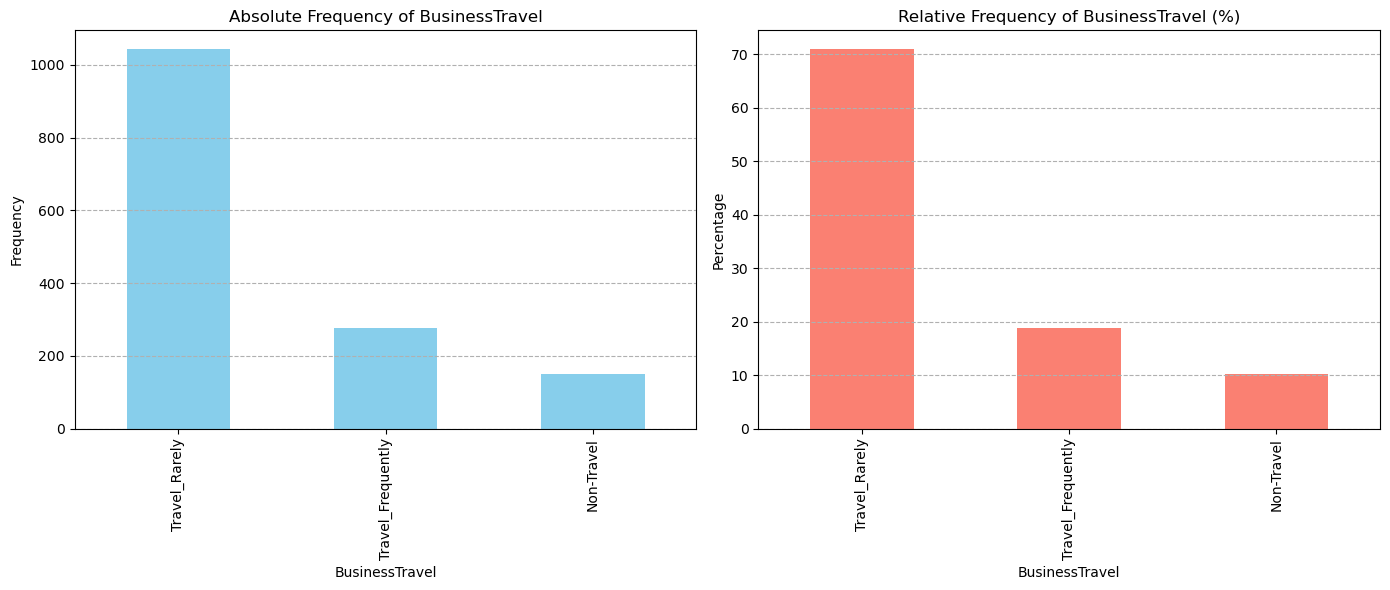

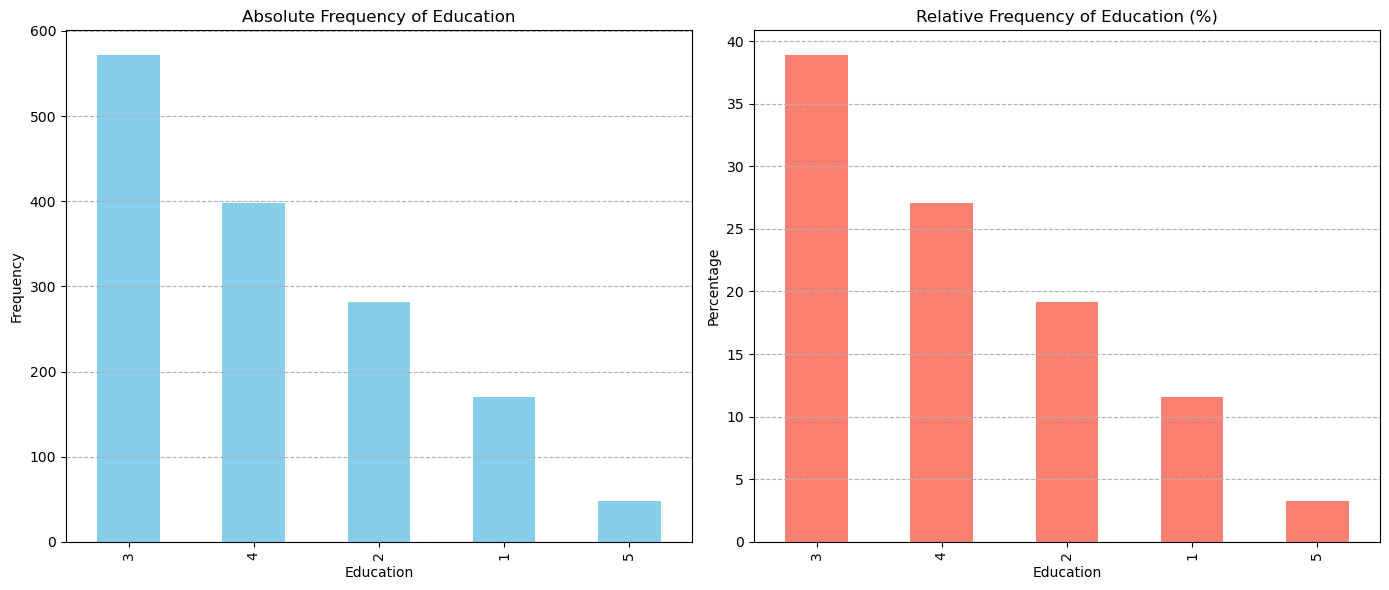

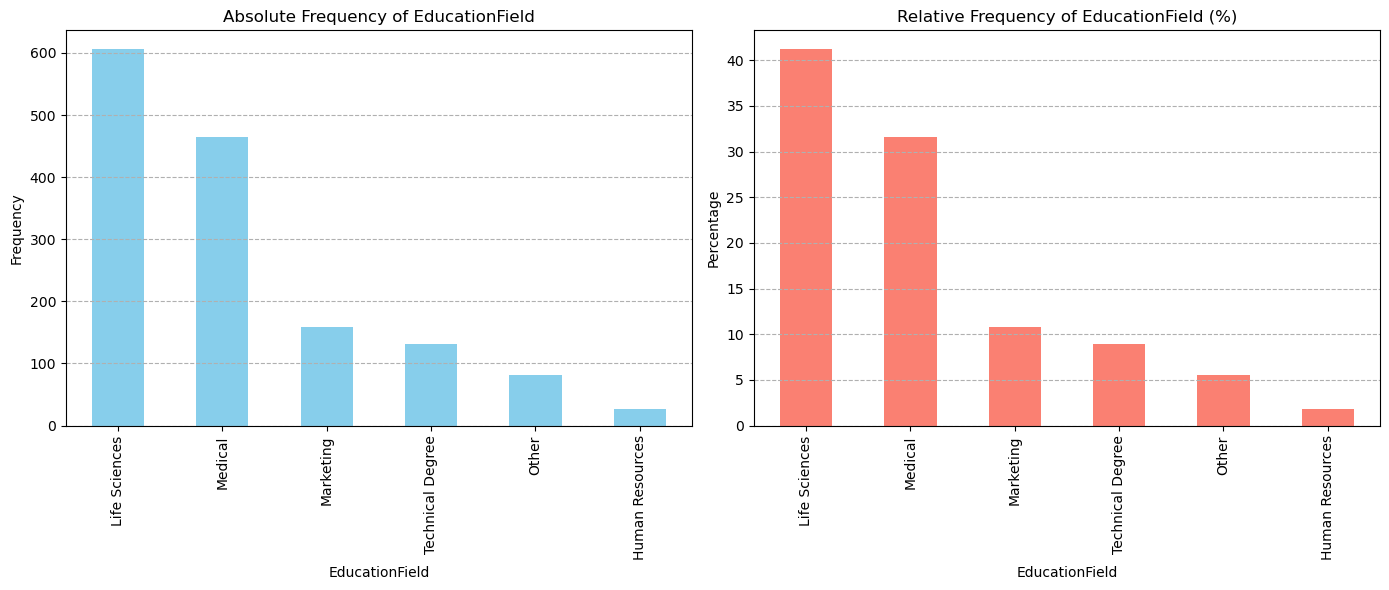

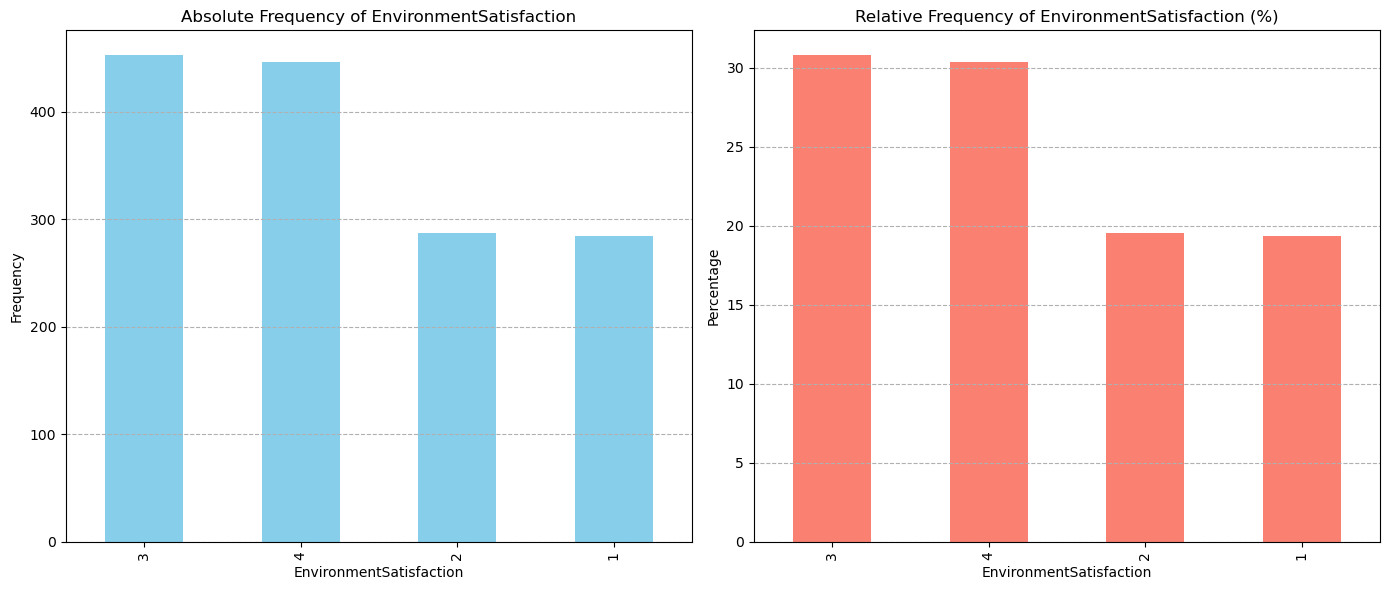

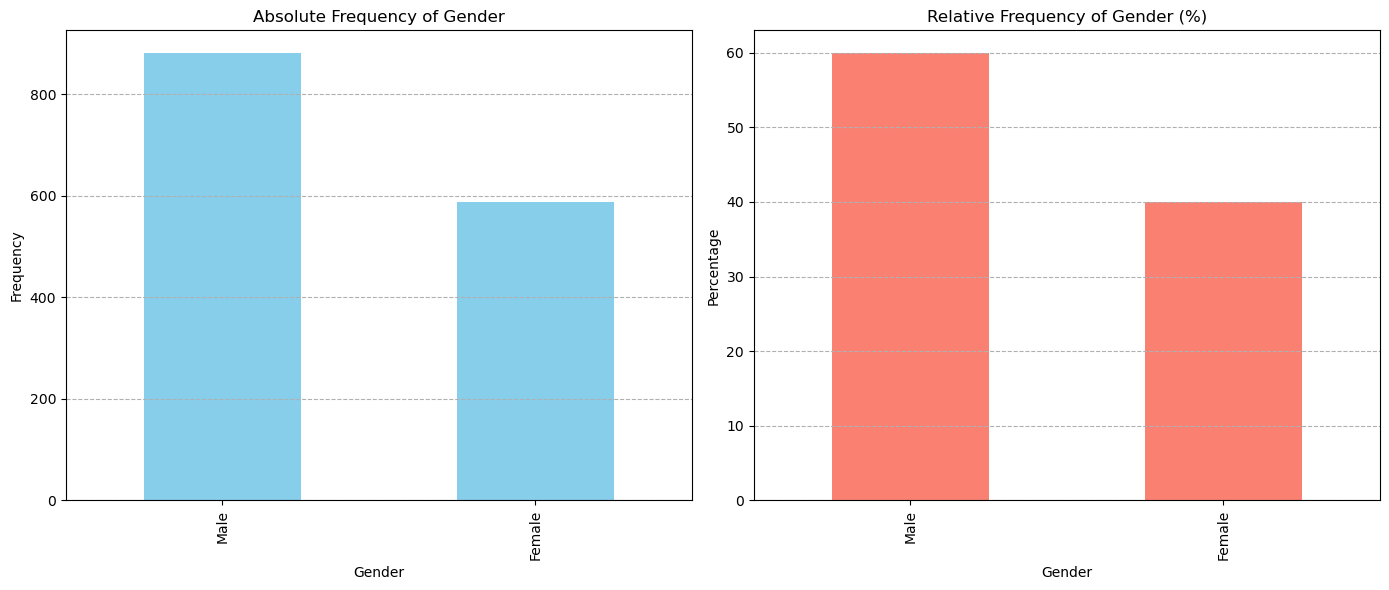

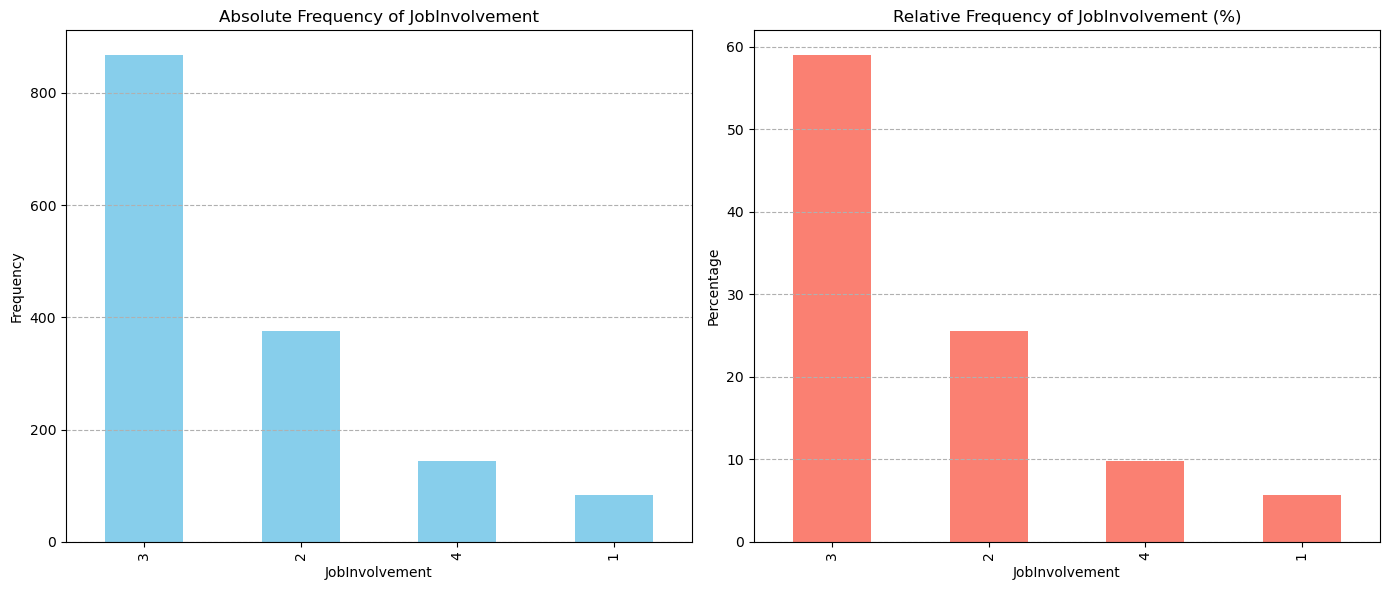

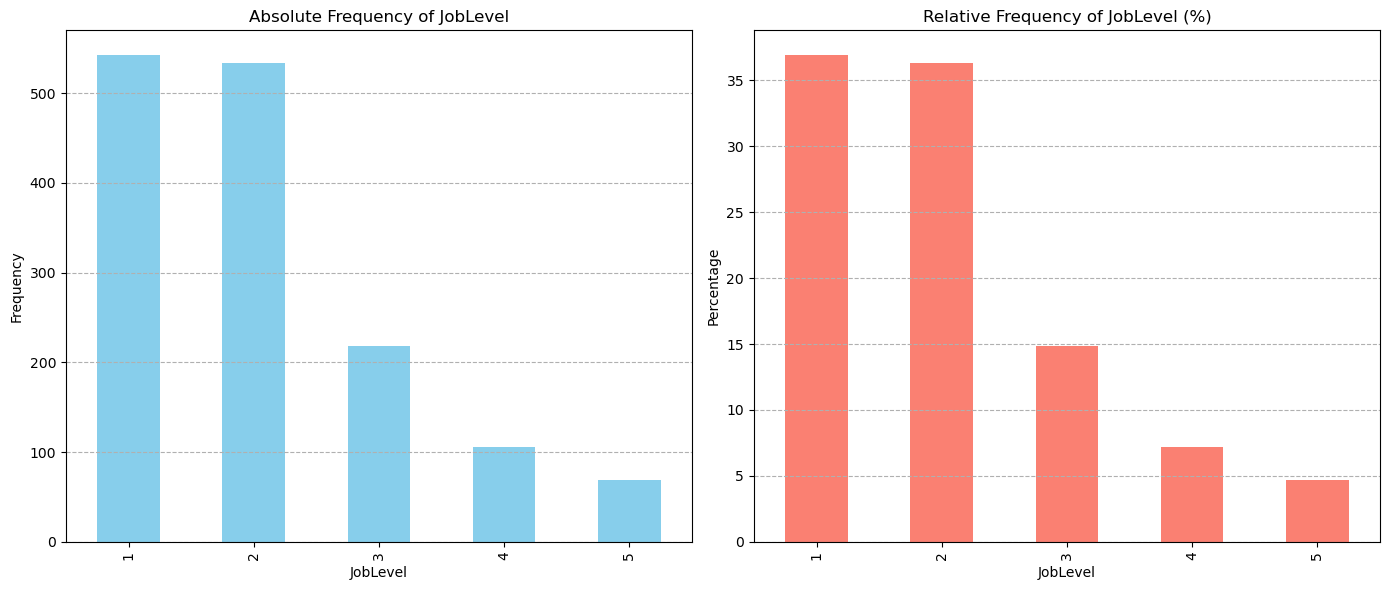

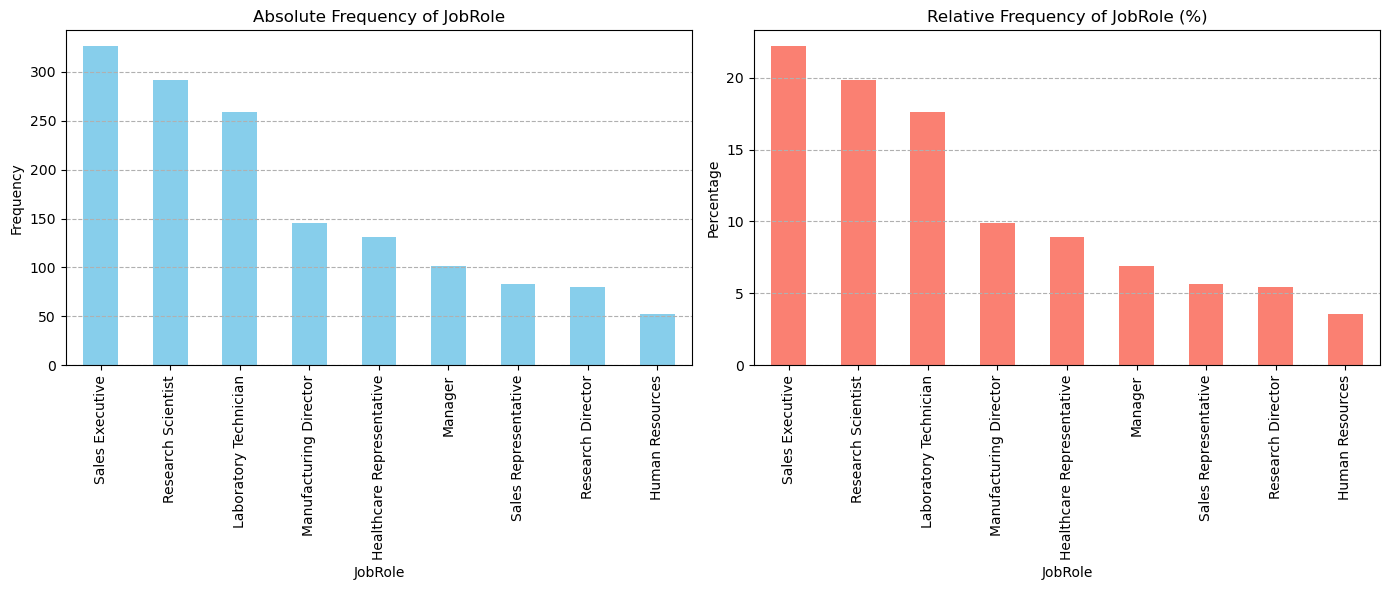

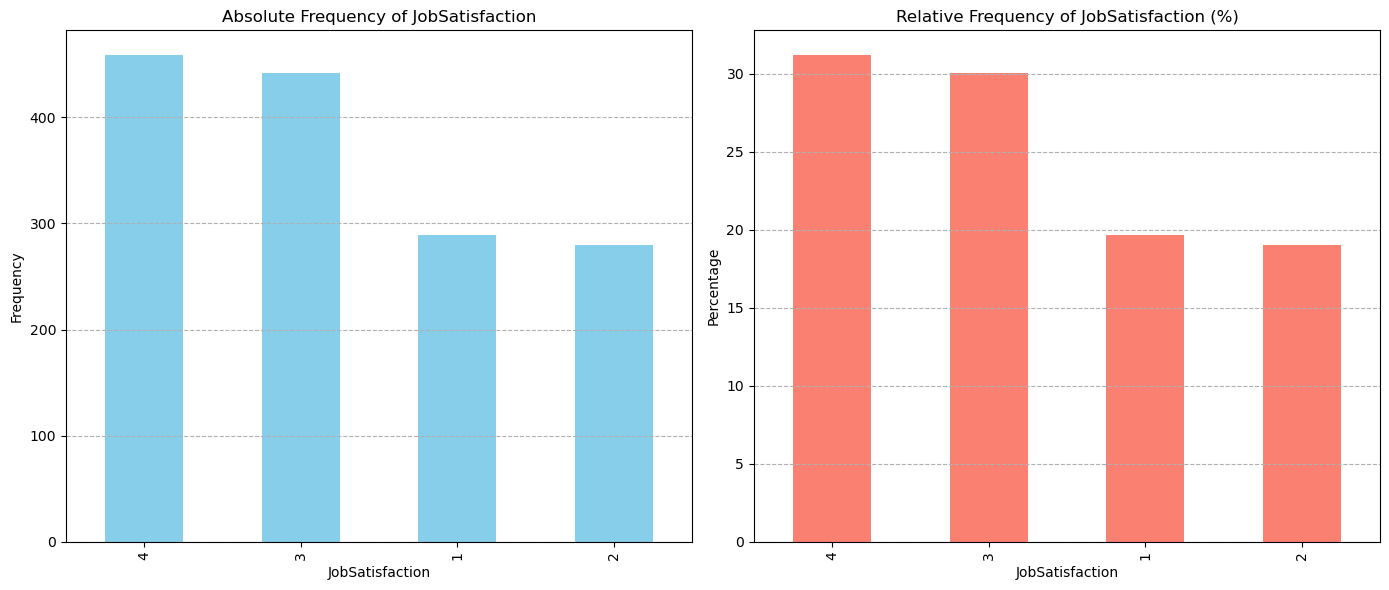

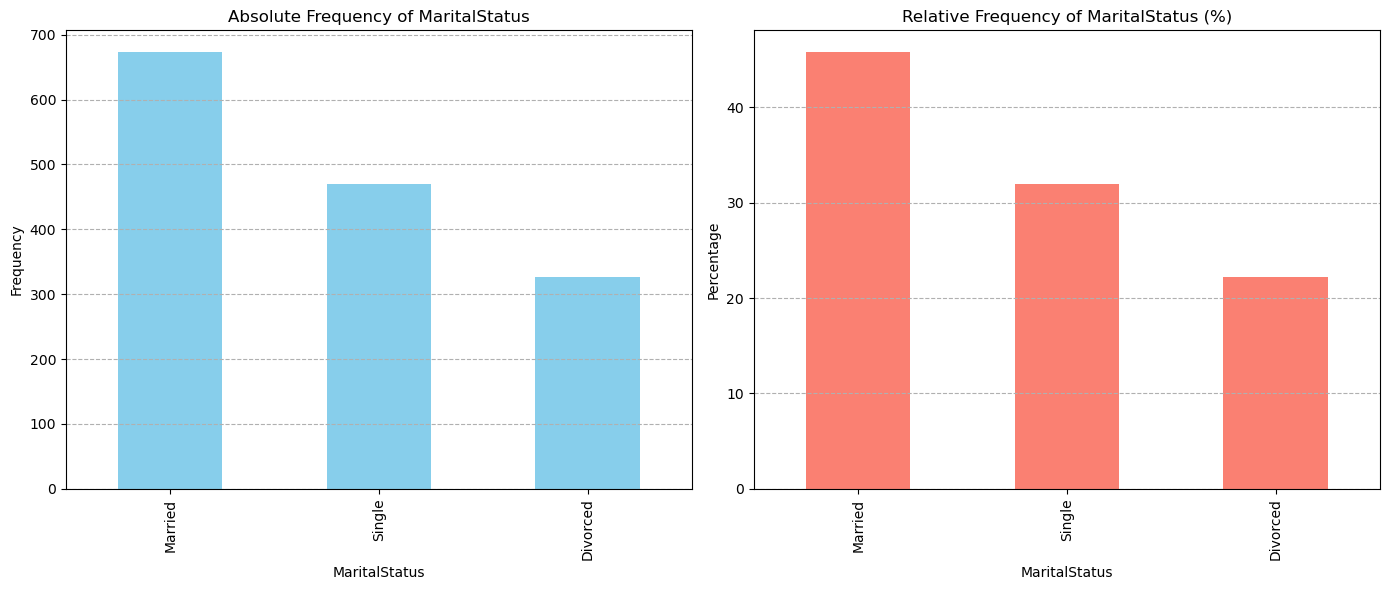

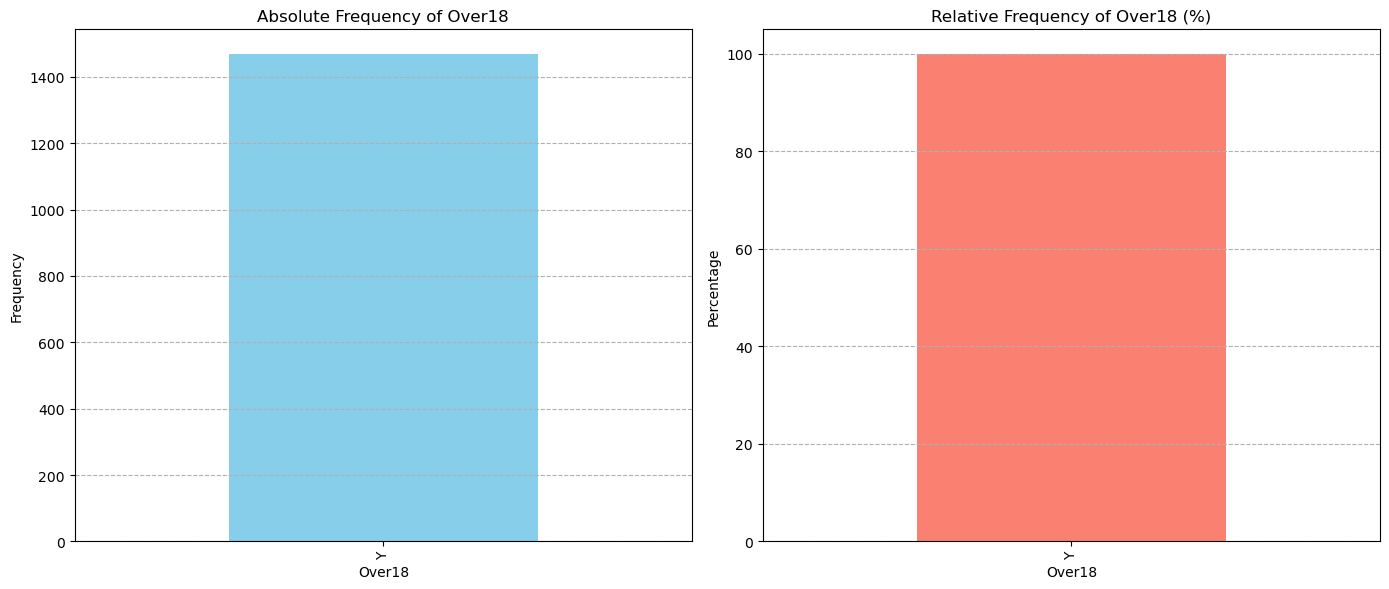

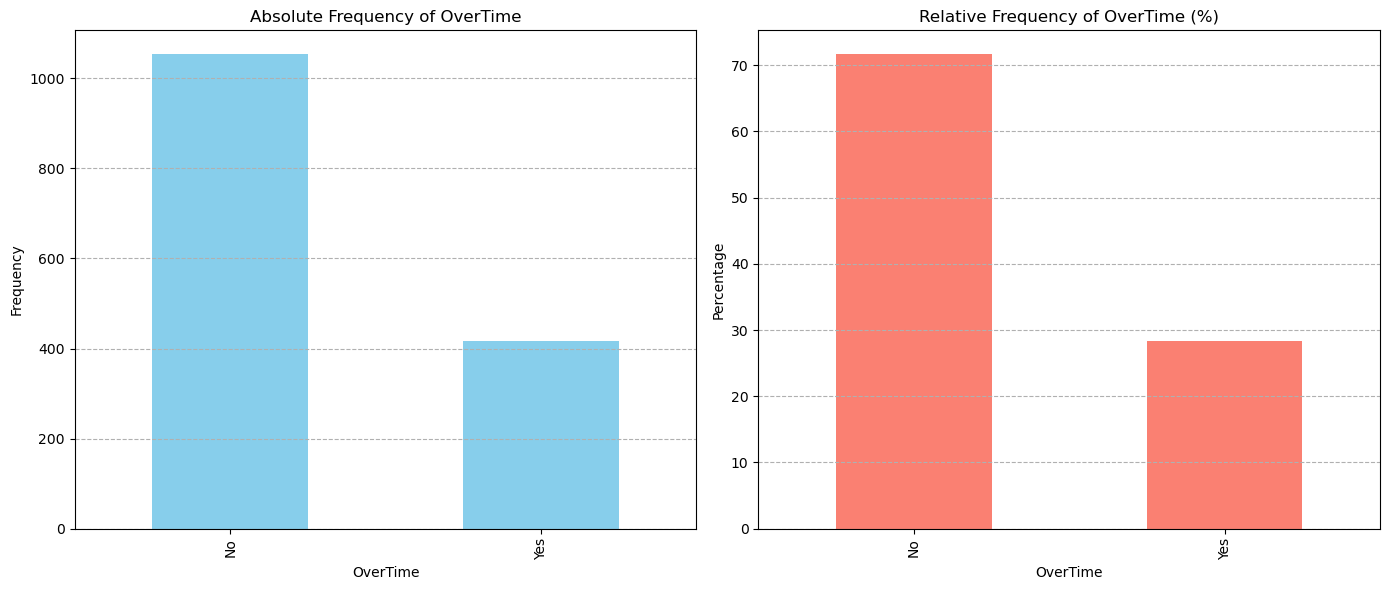

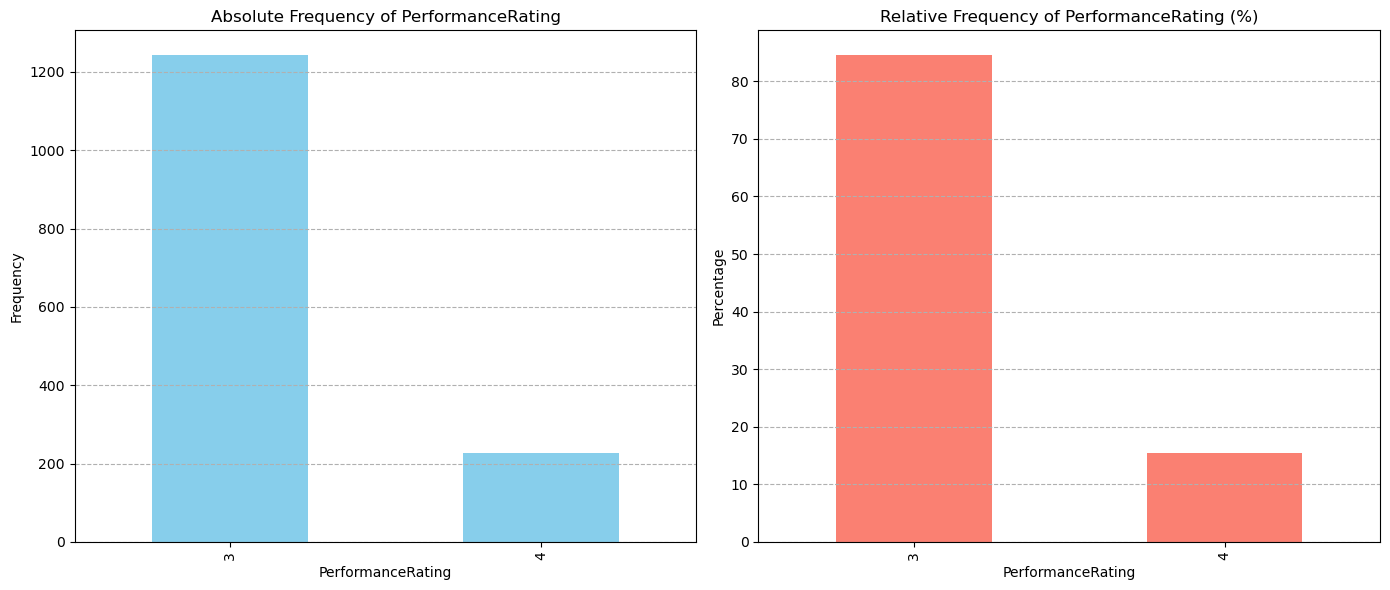

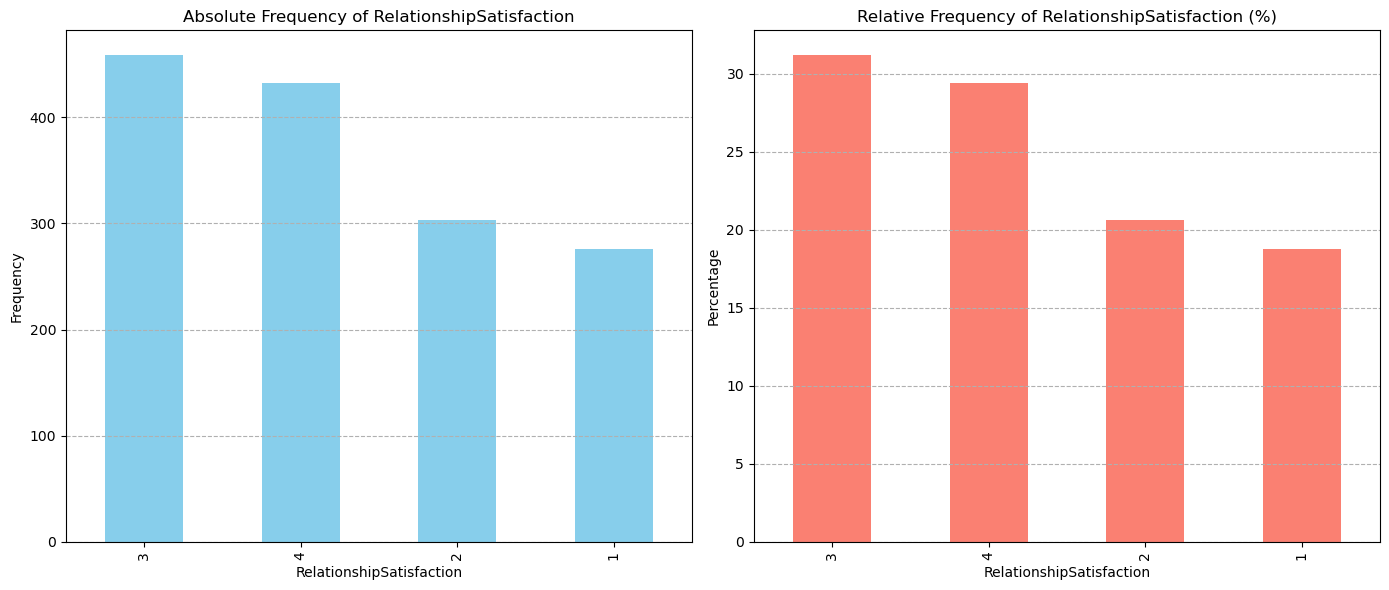

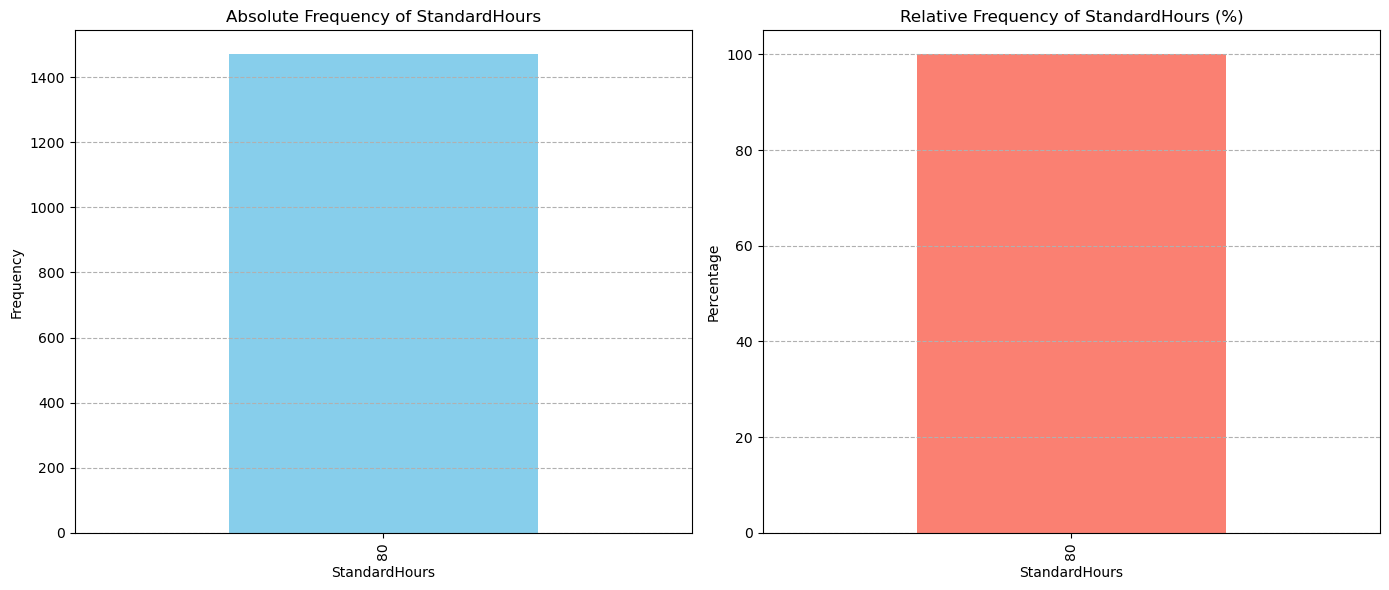

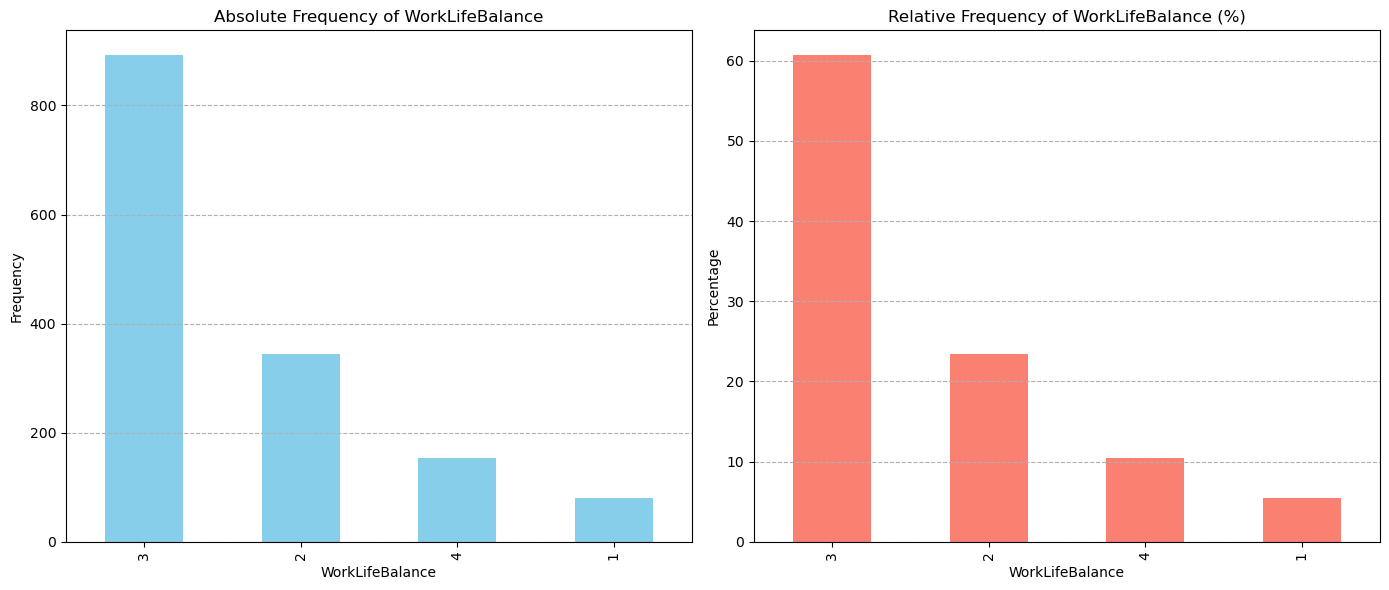

In [62]:
# Function to plot absolute and relative frequencies
def plot_frequency(variable, title):
    abs_freq = df[variable].value_counts()
    rel_freq = df[variable].value_counts(normalize=True) * 100

    plt.figure(figsize=(14, 6))

    # Absolute frequency
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='skyblue')
    plt.title(f'Absolute Frequency of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    # Relative frequency
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='salmon')
    plt.title(f'Relative Frequency of {title} (%)')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()

# Generate plots for each categorical column
for col in cat_cols:
    plot_frequency(col, col)


The plots are a graphical representation of the absolute and relative frequency data explained above. 

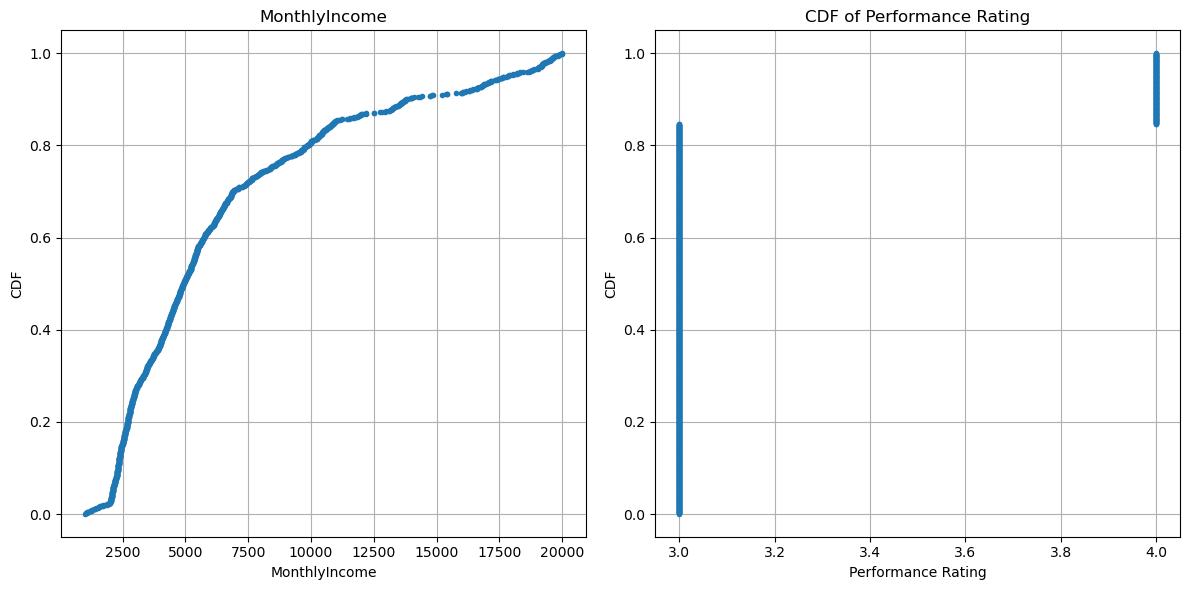

In [63]:
# Plotting the CDF for MonthlyIncome and PerformanceRating
plt.figure(figsize=(12, 6))

# CDF for MonthlyIncome
plt.subplot(1, 2, 1)
satisfaction_sorted = np.sort(df['MonthlyIncome'])
satisfaction_cdf = np.arange(1, len(satisfaction_sorted) + 1) / len(satisfaction_sorted)
plt.plot(satisfaction_sorted, satisfaction_cdf, marker='.', linestyle='none')
plt.title('MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('CDF')
plt.grid(True)

# CDF for performance rating
plt.subplot(1, 2, 2)
hours_sorted = np.sort(df['PerformanceRating'])
hours_cdf = np.arange(1, len(hours_sorted) + 1) / len(hours_sorted)
plt.plot(hours_sorted, hours_cdf, marker='.', linestyle='none')
plt.title('CDF of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('CDF')
plt.grid(True)

plt.tight_layout()
plt.show()

As the cumulative distribution function shows about 20% of employees have a monthly income higher than 10000 while 80% fall below that threshold. 

Additionally, we see that about 82% have a performance rating of three and only 18% have a performance rating of four. 

### Descriptive statistics - Continuous Data 

#### Histogram and Kernel Density Plot

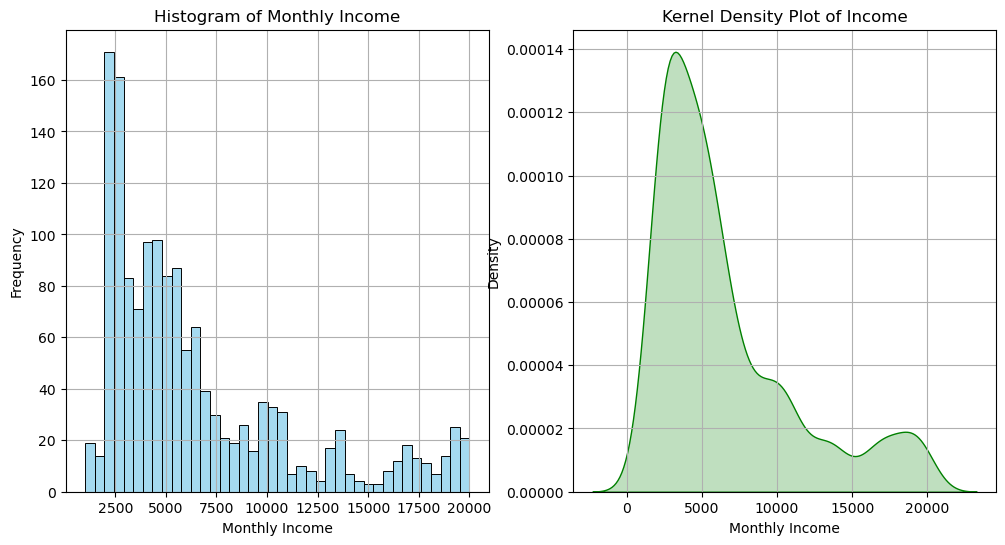

In [64]:
#Plotting a histogram and a kernel density plot for MonthlyIncome to analyze its distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyIncome'], bins=40, kde=False, color='skyblue')
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(df['MonthlyIncome'], fill=True, color='green')
plt.title('Kernel Density Plot of Income')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.grid(True)

The histogram shows a heavily skewed distribution to the right of the monthly income variable. This implies that the majority of employees earns a decent amount but there is a smaller group which makes significantly more. 

#### Measures of central tendency

In [65]:
# Measurng the central tendency of Monthly Income 
min_income = df['MonthlyIncome'].min()
max_income = df['MonthlyIncome'].max()
range_income = max_income - min_income
mean_income = df['MonthlyIncome'].mean()
median_income = df['MonthlyIncome'].median()
q25_income = df['MonthlyIncome'].quantile(0.25)
q75_income = df['MonthlyIncome'].quantile(0.75)
mode_income = df['MonthlyIncome'].mode()

print("Income:")
print(f"  Mean: {round(mean_income,2)}")
print(f"  Median: {round(median_income,2)}")
print(f"  25th percentile: {q25_income}")
print(f"  75th percentile: {q75_income}")
print(f"  Mode: {mode_income.values}\n")

print(f"  Min: {min_income}")
print(f"  Max: {max_income}")
print(f"  Range: {range_income}\n")

# Calculate the skewness 
print('  Skewness:', str(skew(df.MonthlyIncome, axis=0, bias=True)))
# Calculate the kurtosis 
print('  Kurtosis:', str(kurtosis(df.MonthlyIncome, axis=0, bias=True)))

Income:
  Mean: 6502.93
  Median: 4919.0
  25th percentile: 2911.0
  75th percentile: 8379.0
  Mode: [2342]

  Min: 1009
  Max: 19999
  Range: 18990

  Skewness: 1.3684185123330814
  Kurtosis: 0.9977379294765711


Similarly to the histogram we can identify skewed data with more weight in the left tail of the distribution. Furthermore, we see a playkurtic distribution with fewer observations on the tails

#### Variance, standard deviation

In [66]:
#Computing variance and standard deviation for MonthlyIncome to see how much the values deviate from the mean.
income_variance = df['MonthlyIncome'].var()
income_std_dev = df['MonthlyIncome'].std()

print("Income:")
print(f"  Variance: {income_variance:.2f}")
print(f"  Standard Deviation: {income_std_dev:.2f}")


Income:
  Variance: 22164857.07
  Standard Deviation: 4707.96


#### Log transformation

In [67]:
#Transforming MonthlyIncome using log base 2 and log base 10 to reduce skewness and make the data more normally distributed.
df['MonthlyIncome_log'] = np.log(df['MonthlyIncome'])
df['MonthlyIncome_log10'] = np.log10(df['MonthlyIncome'])

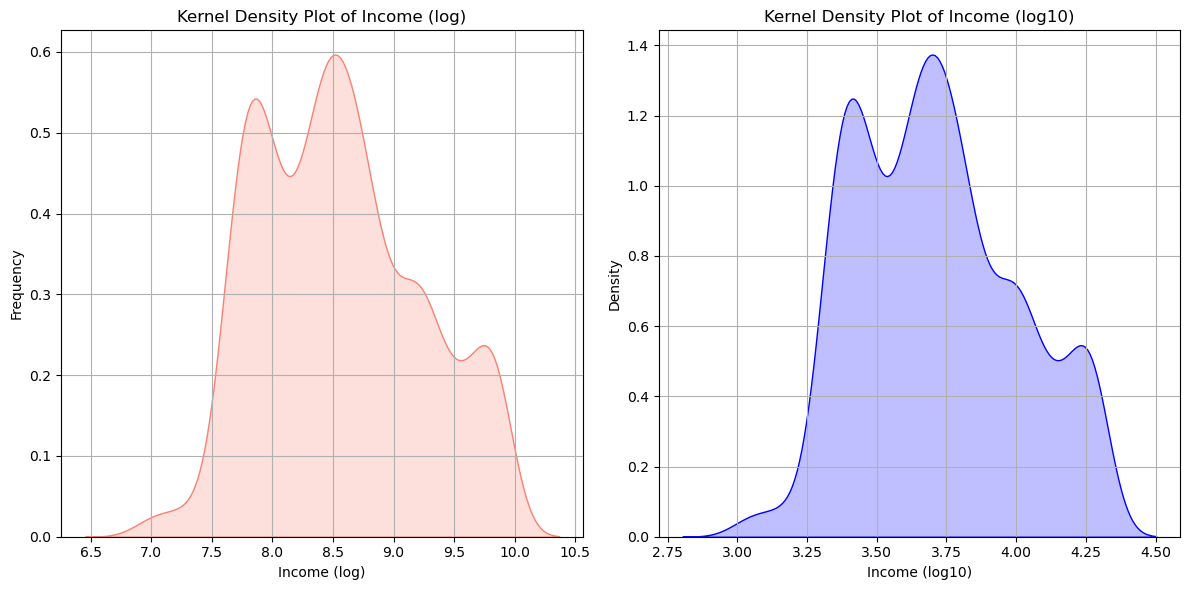

In [68]:
# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Kernel Density Plot
plt.subplot(1, 2, 1)
sns.kdeplot(df['MonthlyIncome_log'], fill=True, color='salmon')
plt.title('Kernel Density Plot of Income (log)')
plt.xlabel('Income (log)')
plt.ylabel('Frequency')
plt.grid(True)

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['MonthlyIncome_log10'], fill=True, color='blue')
plt.title('Kernel Density Plot of Income (log10)')
plt.xlabel('Income (log10)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

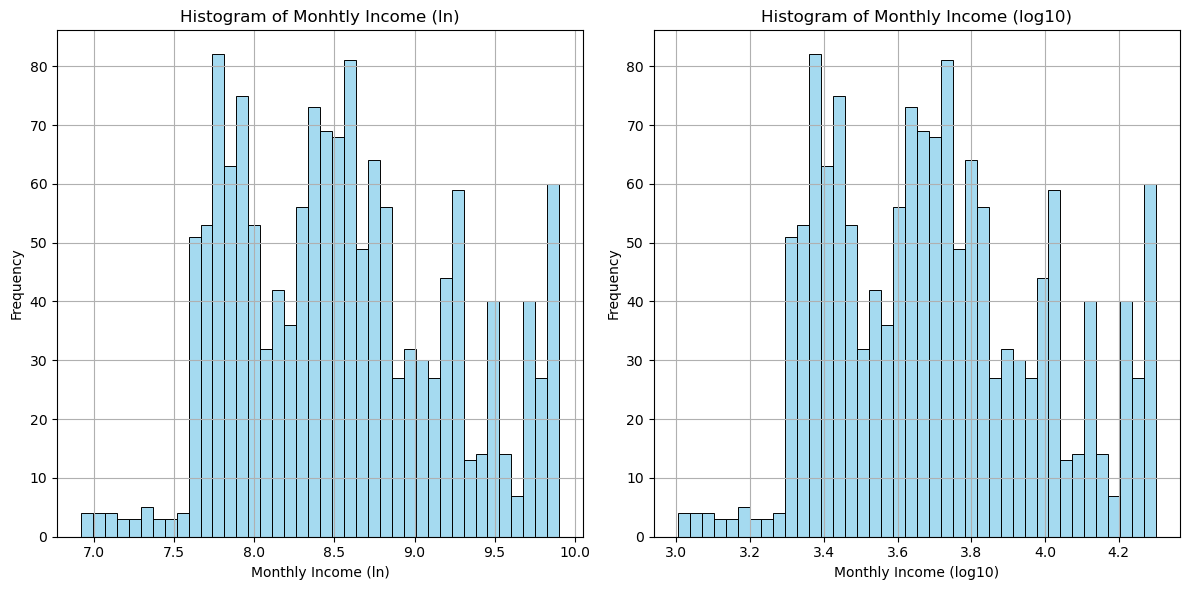

Skewness ln transform: 0.28590017687202646
Skewness log10 transform: 0.28590017687202623
Kurtosis ln transform: -0.6992345608270556
Kurtosis log10 transform: -0.6992345608270534


In [69]:
#Plotting a histogram 
# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyIncome_log'], bins=40, kde=False, color='skyblue')
plt.title('Histogram of Monhtly Income (ln)')
plt.xlabel('Monthly Income (ln)')
plt.ylabel('Frequency')
plt.grid(True)

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.histplot(df['MonthlyIncome_log10'], bins=40, kde=False, color='skyblue')
plt.title('Histogram of Monhtly Income (ln)')
plt.title('Histogram of Monthly Income (log10)')
plt.xlabel('Monthly Income (log10)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


# Calculate the skewness 
print('Skewness ln transform:', str(skew(df.MonthlyIncome_log, axis=0, bias=True)))
print('Skewness log10 transform:', str(skew(df.MonthlyIncome_log10, axis=0, bias=True)))
# Calculate the kurtosis 
print('Kurtosis ln transform:', str(kurtosis(df.MonthlyIncome_log, axis=0, bias=True)))
print('Kurtosis log10 transform:', str(kurtosis(df.MonthlyIncome_log10, axis=0, bias=True)))

The ln transformation improved skewness. The not transformed monthly income variable had: Skewness: 1.3684 and Kurtosis: 0.9977. The ln transformation reduced skewness to 0.2859 and kurtosis to -0.6992. This implies that there is still small positive skewness with more weight in the left tail of the distribution. Kurtosis is still playkurtic which means there are fewer observations on the tails. The log10 transformation shows slightly less skewness and kurtosis. 
However, the transformation created a multimodal distribution.

Apart from age and job role the scatter plots to not highlight any obvious relationship. Income tends to increase with age. However after the age of 40 income becomes very variable. In terms of Job Role, we can identify that some roles tend to earn more for example, managers and research directors

## 3.3 Descriptive statistics of correlations


### Scatter plots

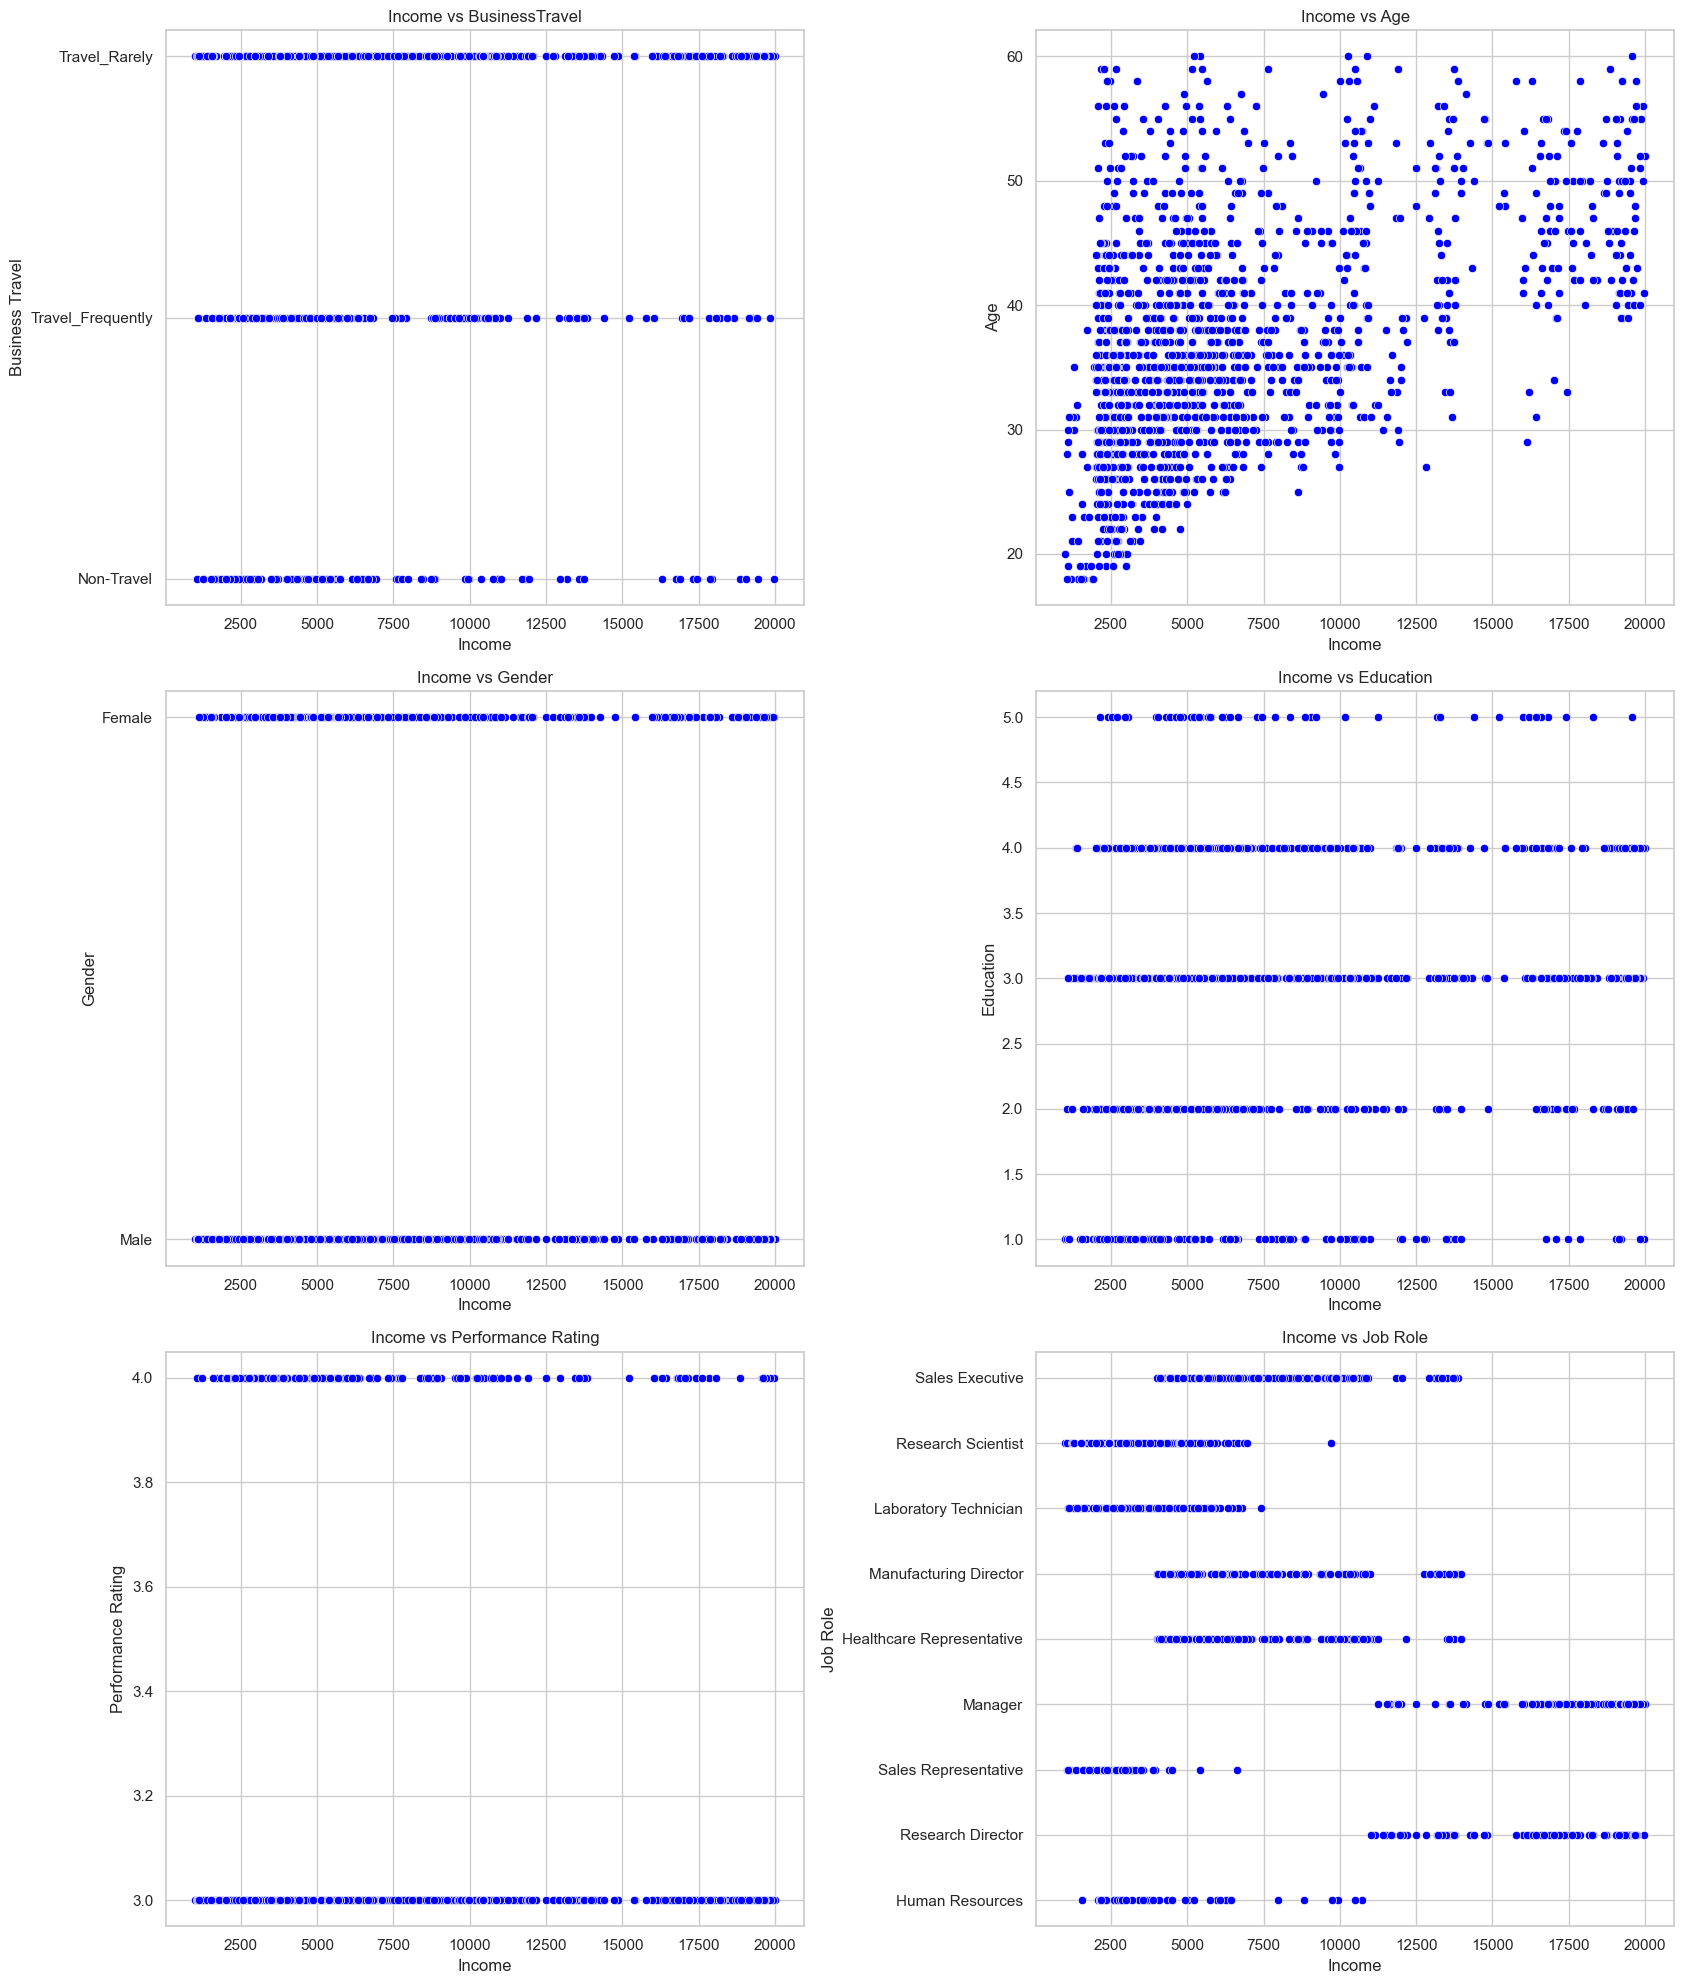

In [70]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axis objects
fig, axes = plt.subplots(3, 2, figsize=(17, 20))
axes = axes.flatten()

# Scatter plot of Monthly Income vs all relevant variables
sns.scatterplot(x=df['MonthlyIncome'], y=df['BusinessTravel'], ax=axes[0], color='blue')
axes[0].set_title('Income vs BusinessTravel')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Business Travel')

sns.scatterplot(x=df['MonthlyIncome'], y=df['Age'], ax=axes[1], color='blue')
axes[1].set_title('Income vs Age')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Age')

sns.scatterplot(x=df['MonthlyIncome'], y=df['Gender'], ax=axes[2], color='blue')
axes[2].set_title('Income vs Gender')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Gender')

sns.scatterplot(x=df['MonthlyIncome'], y=df['Education'], ax=axes[3], color='blue')
axes[3].set_title('Income vs Education')
axes[3].set_xlabel('Income')
axes[3].set_ylabel('Education')

sns.scatterplot(x=df['MonthlyIncome'], y=df['PerformanceRating'], ax=axes[4], color='blue')
axes[4].set_title('Income vs Performance Rating')
axes[4].set_xlabel('Income')
axes[4].set_ylabel('Performance Rating')

sns.scatterplot(x=df['MonthlyIncome'], y=df['JobRole'], ax=axes[5], color='blue')
axes[5].set_title('Income vs Job Role')
axes[5].set_xlabel('Income')
axes[5].set_ylabel('Job Role')

plt.tight_layout()
plt.show()

### Covariance

In [71]:
#Computing the covariance matrix for the numerical variables such as MonthlyIncome, Age, and PerformanceRating to see how these variables change together.
covariance_matrix = df[['MonthlyIncome', 'Age', 'PerformanceRating']].cov()
print(covariance_matrix)

                   MonthlyIncome           Age  PerformanceRating
MonthlyIncome       2.216486e+07  21412.198982         -29.082690
Age                 2.141220e+04     83.455049           0.006276
PerformanceRating  -2.908269e+01      0.006276           0.130194


The covariance matric shows that monthly income tends to increase with age. Monthly income tends to decrease with performance rating. There is almost no correlation between age and performance rating. 

### Correlation

In [72]:
# Compute the Pearson correlation matrix
pearson_corr = df[['MonthlyIncome', 'Age']].corr(method='pearson')

# Compute the Spearman correlation matrix
spearman_corr = df[['MonthlyIncome', 'PerformanceRating', 'Education']].corr(method='spearman')

# Print the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr, "\n")

print("Spearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
               MonthlyIncome       Age
MonthlyIncome       1.000000  0.497855
Age                 0.497855  1.000000 

Spearman Correlation Matrix:
                   MonthlyIncome  PerformanceRating  Education
MonthlyIncome           1.000000          -0.026999   0.120028
PerformanceRating      -0.026999           1.000000  -0.025081
Education               0.120028          -0.025081   1.000000


Moderate positive relation between monthly income and age. This means that as age increases, income tends to increase in a roughly linear fashion which is consistent with career progression and seniority.

According to spearman higher education levels are associated with slightly higher monthly income. Performance level is associated negatively with monthly income which implies that higher performance levels are associated with slightly lower salaries. 

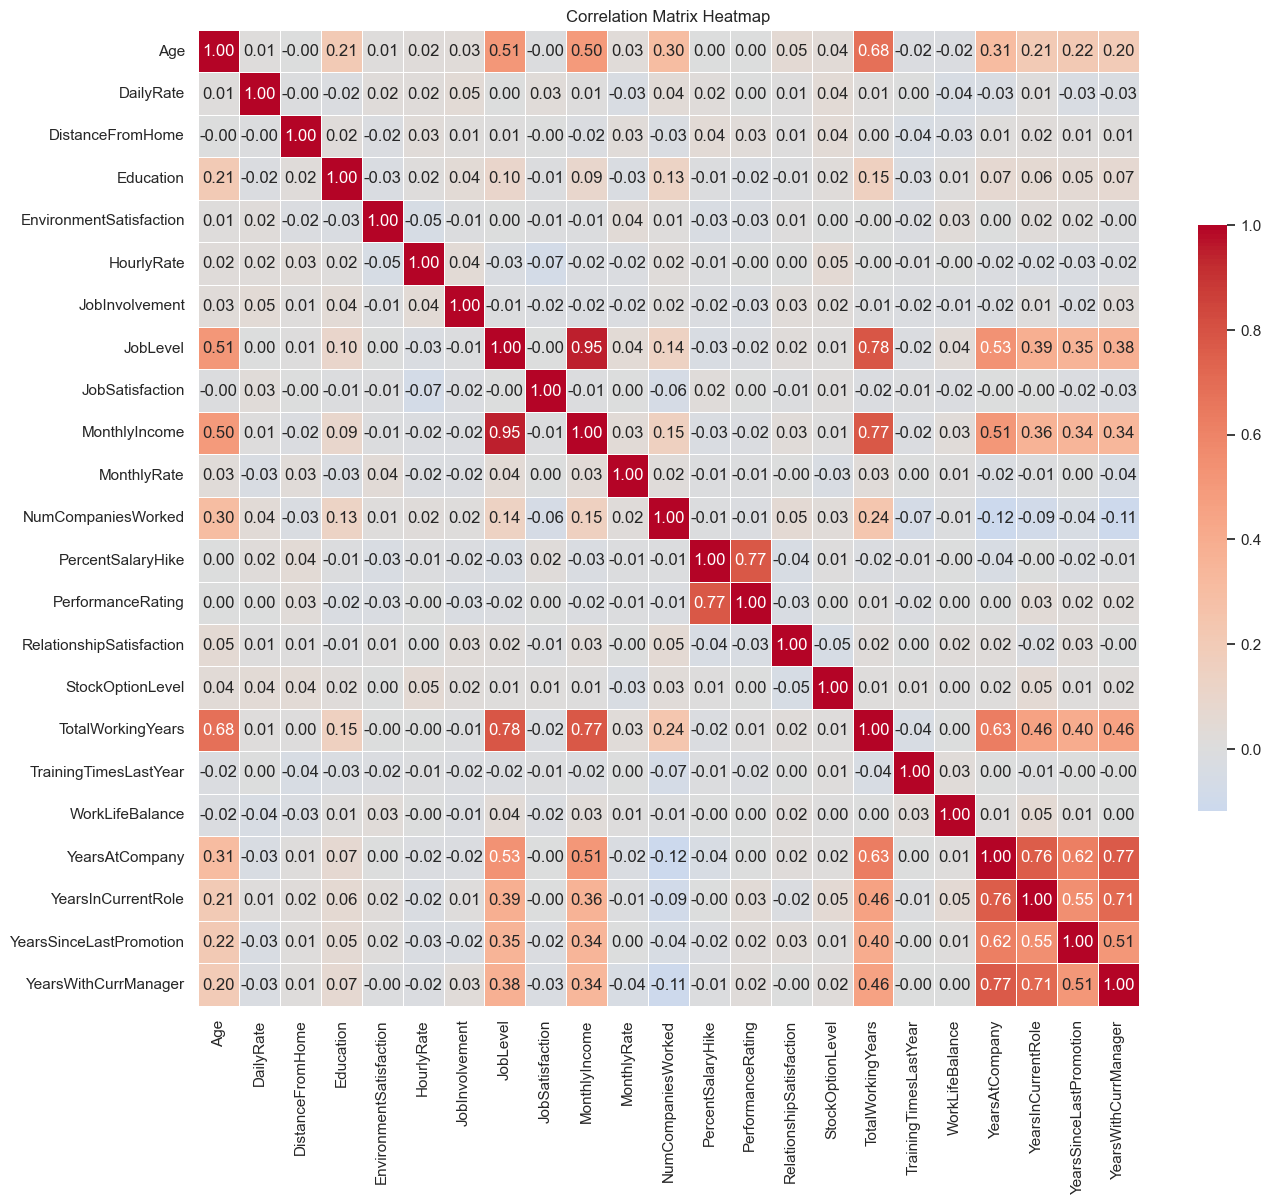

In [73]:
# Visualizing the correlation matrix using a heatmap for all relevant numerical variables to see the strength and direction of relationships between them.
# List of relevant numerical columns
int_cols = [
    "Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement",
    "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
    "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance",
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"
]

existing = [c for c in int_cols if c in df.columns]
data = df[existing].apply(pd.to_numeric, errors="coerce")
corr = data.corr(method="pearson")

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.6})
plt.tight_layout()
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix allows us to detect patterns. For exmaple, we can see that YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager have positive correlation and therefore tend to move together. This is logical because people tend to stay in their jobs. 

In [74]:
# Select relevant columns
data = df[['MonthlyIncome', 'BusinessTravel', 'Age', 'Gender', 'Education', 'PerformanceRating', 'JobRole']]

# Calculate summary statistics
summary_stats = data.describe().T[['count', 'mean', 'std', 'min', 'max']]


# rename row index
summary_table = summary_stats.rename(index={})

# Print the summary table
summary_table = np.round(summary_table,2)
summary_table


,count,mean,std,min,max
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,19999.0
Age,1470.0,36.92,9.14,18.0,60.0
Education,1470.0,2.91,1.02,1.0,5.0
PerformanceRating,1470.0,3.15,0.36,3.0,4.0


# 4. Method 1: Linear Regression 


## 4.1 Model 1

The following section uses linear regression to test the hypothesis H1: Controlling for age, gender, education, performance and role, travel frequency have a positive effect on income? 

Linear regression was chosen because it allows us to derive insights about travel frequency holding everything else equal. The dependent variable is continuous, therefore suited for linear regression. Linear regression estimated the magnitude and direction of a relationship of continuous and categorical variables. Using dummy encoding allows us to analyse complex scenarios with comparably low effort.

In [75]:
# Developing an ordinary least squares regression model to analyse the effect of travel freqeuency on monthly income. To create an identical object we controlled for for demographics, education, performance rating, and job role.
model1 = smf.ols(formula= 'MonthlyIncome ~ JobRole + BusinessTravel + Age + Gender + Education + PerformanceRating', data=df)
results1 = model1.fit()

# Print the regression results summary
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     525.3
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:19:59   Log-Likelihood:                -13194.
No. Observations:                1470   AIC:                         2.642e+04
Df Residuals:                    1455   BIC:                         2.650e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Analysing the regression output

Due to the violations of our model (see below) we have to be careful with the analysis of the model. 

The OLS model explains a large portion of variation in MonthlyIncome with R-squared 0.835. This implies that about 83.5% of variance is captured by the predictors in our model, which implies that we have a good model. 

The intercept of 4686.5027 predicts the monthly income for the baseline group which is a Healthcare Representative who does not travel and is female. All numerical predictors are 0 i.e. age, education and performance. Therefore, no insight can be generated using the intercept by itself. 

Holding everything else constant Job Roles apart from Manufacturing Director and Sales Executives are statistically significant meaning they all earn different amounts compared to the baseline (p-values < .05). For example, a Manager holding all else equal makes 9149.78 more than the Healthcare Representative per month. Age is also statistically significant implying with every increase in age by one year salary increases by 76.76 (p-value < .05). Gender, education and performance rating are statistically insignificant (p-values > .05).  

The business travel variable is statistically different between frequent travel and no travel highlighting that someone who travels frequently makes about 476 more than someone who does not travel at all (p-value < .05). 
Interesting here is that this is holding everything else equal. Statistically speaking the same person make more if they travel. 

In terms of our hypothesis, this would imply that travel frequency while keeping everything else constant has a positive effect on Monthly Income. 

Since the dependent variable, Monthly Income is not normally distributed we will continue with the transformed model to check if the assumptions are given and the model allows us to interpret the hypothesis. 

## 4.2 Model 1: Assumptions


The following section analyses the model assumptions: 
- Linearity: There should be a linear relationship between the independent and dependent variable
- Homoscedasticity: Residuals should have constant variance
- Normality of Residuals: Residuals should be normally distributed
- No Multicollinearity: Independent varibales should not be highly correlated with each other
- Independence of Errors: The residuals should be independent from each other 
- No Autocorrelation: Residuals should not be correlated


### 4.2.1 Linearity 


/Users/henrikpeuker/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Actual vs. Predicted')

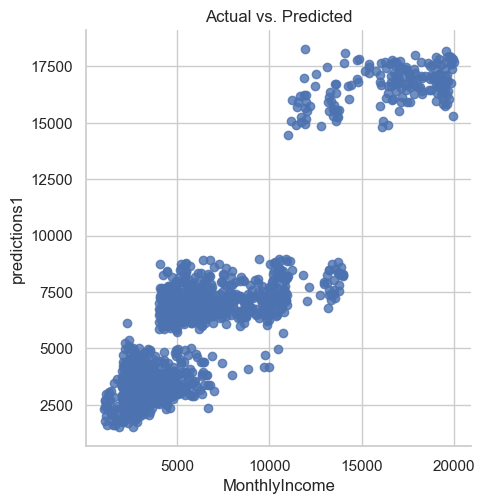

In [76]:
# Testing the linearity assumption by poltting actual vs predicted values

# Add predictions to the data frame
df['predictions1'] = results1.predict()
df['residuals1'] = results1.resid # computing residuals (i.e., actual - predicted values)

#Plotting the actual vs predicted values to see if there is a linear relationship between them.
sns.lmplot(x='MonthlyIncome', y='predictions1', data=df, fit_reg=False)        
plt.title('Actual vs. Predicted')


There is no linear relationship between the predicted values and the actual values. Based on the plot we can see that Monthly Income is distributed accross three groups. After checking the other assumptions we transform the model using logarithms to get a more linear relationship.


### 4.2.2 Homoscedasticity 

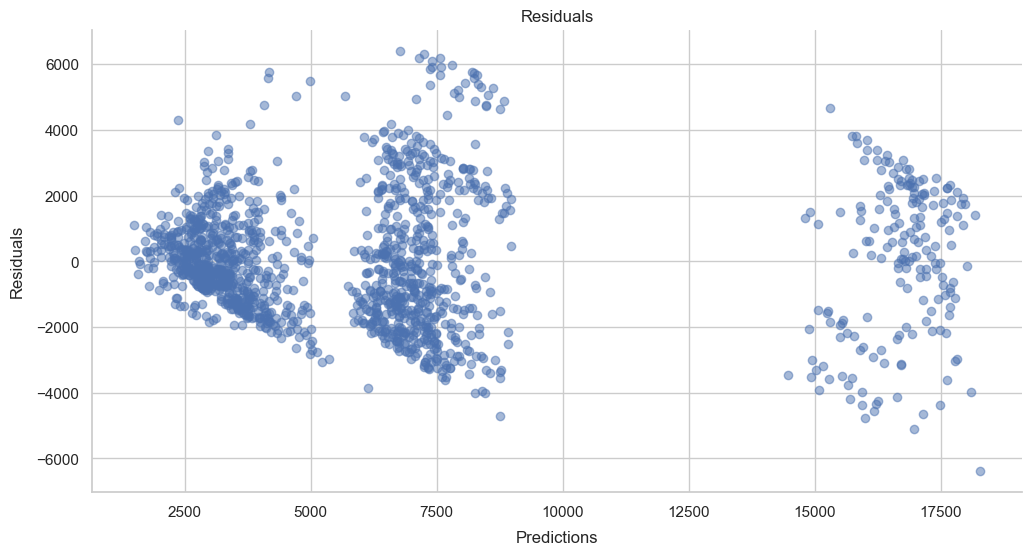

In [77]:
# Plotting the residuals against the predicted values to check for homoscedasticity.

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df.predictions1, y=df.residuals1, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.xlabel('Predictions', fontsize=12, labelpad=8)
plt.ylabel('Residuals', fontsize=12, labelpad=8)
plt.title('Residuals')
plt.show()

The plot shows the predictions compared to the residuals. There seems to be a non-random pattern more similar to a funnel, this indicates a violation of the homoscedasticity assumption. 

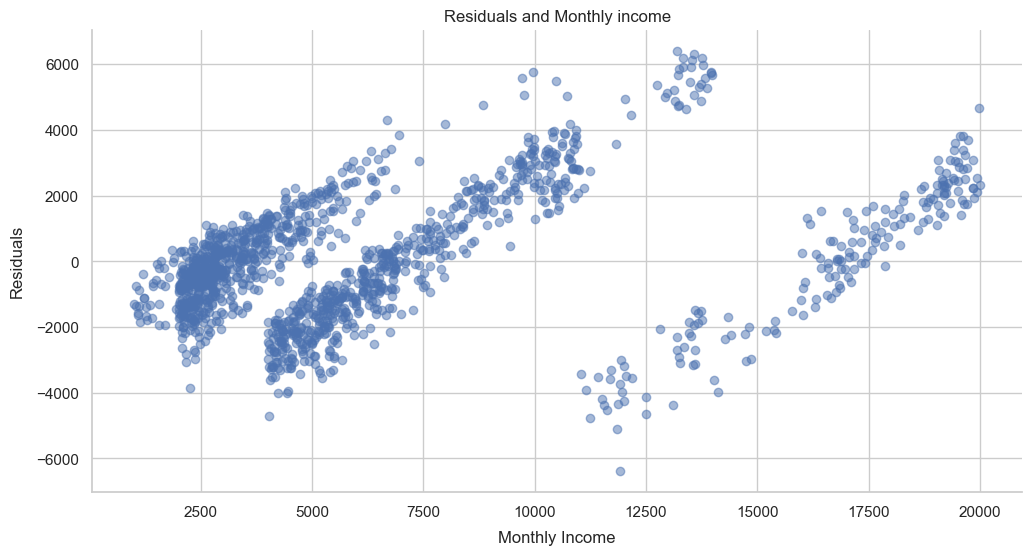

In [78]:
# Plotting the residuals to actual values to check for homoscedasticity
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df.MonthlyIncome, y=df.residuals1, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.xlabel('Monthly Income', fontsize=12, labelpad=8)
plt.ylabel('Residuals', fontsize=12, labelpad=8)
plt.title('Residuals and Monthly income')
plt.show()

The plot shows the monthly income compared to the residuals. The assumption of homoscedasticity seems to be violated as residuals do not follow a line and are not equally distributed. To minimise this issue we use heteroscedasticity robust standard errors.

### 4.2.3 Normality of residuals

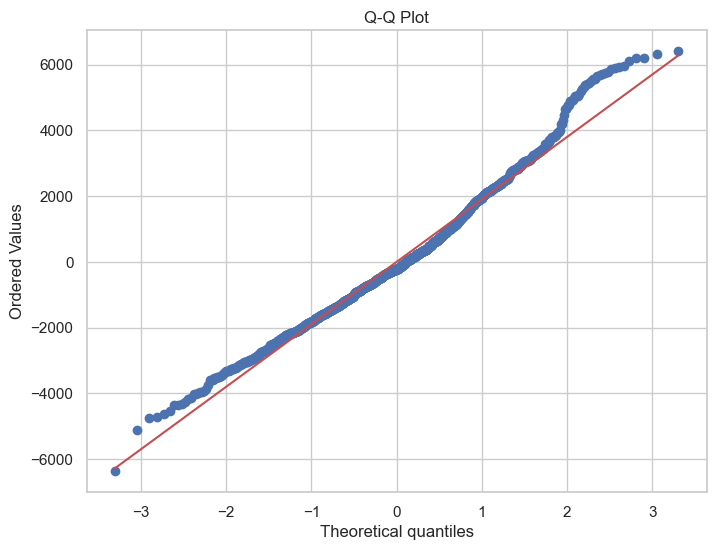

In [79]:
# Q-Q plot for normality to see if the residuals are normally distributed
plt.figure(figsize=(8,6))
stats.probplot(df['residuals1'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

The assumption normality of residuals seems to be met as the residuals follow a straight line. However, similar to before for large observations (high income) the standard errors do not follow a straight line. 

### 4.2.4 Multicollinearity 

In [80]:
# Create a dataframe of independent variables
X = results1.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results1.model.exog_names

print(vif)

    VIF Factor                             features
0   128.291496                            Intercept
1     1.358541           JobRole[T.Human Resources]
2     2.525810     JobRole[T.Laboratory Technician]
3     1.706749                   JobRole[T.Manager]
4     1.908117    JobRole[T.Manufacturing Director]
5     1.539373         JobRole[T.Research Director]
6     2.662676        JobRole[T.Research Scientist]
7     2.739574           JobRole[T.Sales Executive]
8     1.619851      JobRole[T.Sales Representative]
9     2.328334  BusinessTravel[T.Travel_Frequently]
10    2.323643      BusinessTravel[T.Travel_Rarely]
11    1.014413                       Gender[T.Male]
12    1.277810                                  Age
13    1.054944                            Education
14    1.006283                    PerformanceRating


The VIF factor shows that no variables are linear combinations of other variables as all values are below the critical threshold of 5. Hence, multicollinearity is not a problem in our data. 

### 4.2.5 Independence of Errors (autocorrelation of errors)

In [81]:
# Perform the Durbin-Watson test
dw_test = durbin_watson(df['residuals1'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.0384397655748305


There does not seem to be a problem of autocorrelation of errors as the Durbin-Watson Test is within the critical threshold of 1.5 and 2.5. This implies that residuals are independent. 

### 4.2.6 Conclusion

To sum it up, testing the assumptions shows there is a clear violation of the linearity assumption and the homoscedasticity assumption. 

The residuals seem to be normal distributed, there is no problem of multicollineartiy, the errors are independent and there is no autocorrelation. Hower since the linearity assumption is violated we have to be careful with the interpretations. 

To improve the violated assumptions we transformed the dependent variable using log and apply HC3 which uses heteroscedasticity robust standard errors.

## 4.3 Model 2: Log

To minimise the violation of linearity as explained above we transformed the dependent variable using the natural logarithm. Additionally, due to the violation of homoscedasticity we used HC3 which are heteroscedasticity robust standard errors. We then assessed the assumptions.

In [82]:
# In the exploratory data analysis we identified that the distribution of MonthlyIncome is right-skewed. To address this, we applied a log2 transformation to the MonthlyIncome variable to normalize its distribution. We then re-ran the regression analysis using this transformed variable as the dependent variable.
model3 = smf.ols(formula= 'MonthlyIncome_log ~ JobRole + BusinessTravel + Age + Gender + Education + PerformanceRating', data=df)
results3 = model3.fit(cov_type = "HC3")

# Print the regression results summary
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:      MonthlyIncome_log   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     762.0
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:20:00   Log-Likelihood:                -370.65
No. Observations:                1470   AIC:                             771.3
Df Residuals:                    1455   BIC:                             850.7
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Analysing the regression output
This transformed model using the natural algorithm was designed to fulfill the linearity assumption of OLS. However, also the transformed model is not able to meet the linearity assumption. Therefore all insights derived from this model must only be considered with caution. 

The regression outputs of the transformed models show that these models are not necessarily better at capturing the variance of MonthlyIncome_log. The lower r-squared, 0.780 compared to 0.835, means that the transformed model is only able to explain 78% of the variance of MonthlyIncome. 

Similar to the previous model the intercept is not insightful for real world applications. 

One major difference of the transformed model is that every change in the independent variable leads to a percentage change of the dependent variable(e^ß). In this model, all Job Roles have statistically different Monthly Income from the baseline (HealthCare Representative) apart from Manufacturing Director and Sales Executive (p-values < .05). This implies that a Manager earns 121% more than the baseline. Age is also statistically significant (p-value < 0.5). This implies, a one year increase in age corresponds to a 1.2% increase in Monthly Income. Gender, education and performance rating are not statistically significant (p-value > .05). Implying that men and women earn the same amount, that higher education does not mean higher income and that better performance does not lead to higher Monthly Income. 

Lastly, high travel frequency is statistically significant (p=0.018) implying that employees who travel frequently earn about 8.2% more than non travellers. 

To summarise, job roles are the strongest predictor of Log Monthly Income, with leadership positions paying much more than entry-level positions. Age and travel frequency also positively influence Monthly Income. 

For the hypothesis this would imply that the null hypothesis can be rejected and travel frequency has a positive effect on monthly income controlling for role, demographics, performance and eduction. 



## 4.4 Model 2: Assumptions

For completeness, we also test the assunmptions for the Log model: 

- Linearity: There should be a linear relationship between the independent and dependent variable
- Homoscedasticity: Residuals should have constant variance
- Normality of Residuals: Residuals should be normally distributed
- No Multicollinearity: Independent varibales should not be highly correlated with each other
- Independence of Errors: The residuals should be independent from each other 
- No Autocorrelation: Residuals should not be correlated


#### 4.4.1 Linearity

/Users/henrikpeuker/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Actual vs. Predicted')

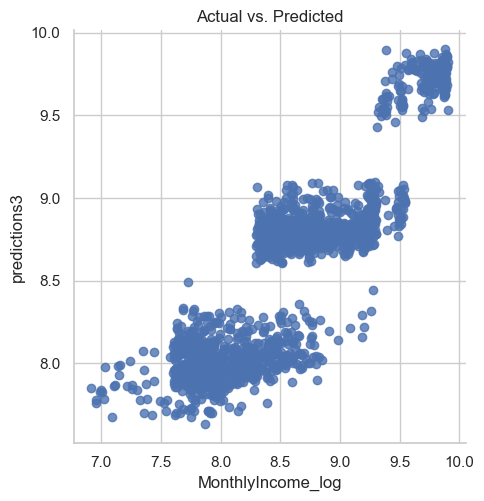

In [83]:
# making predictions
pred_insample = results3.predict() # or results.fittedvalues

# add predictions to the data frame
df['predictions3'] = results3.predict()
df['residuals3'] = results3.resid # computing residuals (i.e., actual - predicted values)

sns.lmplot(x='MonthlyIncome_log', y='predictions3', data=df, fit_reg=False)        
plt.title('Actual vs. Predicted')

The log transformation has improved the model compared to the basic model. However, the linearity assumption might still be violated. Insights generated from this model should be taken with caution. 

#### 4.4.2 Homoscedasticity 

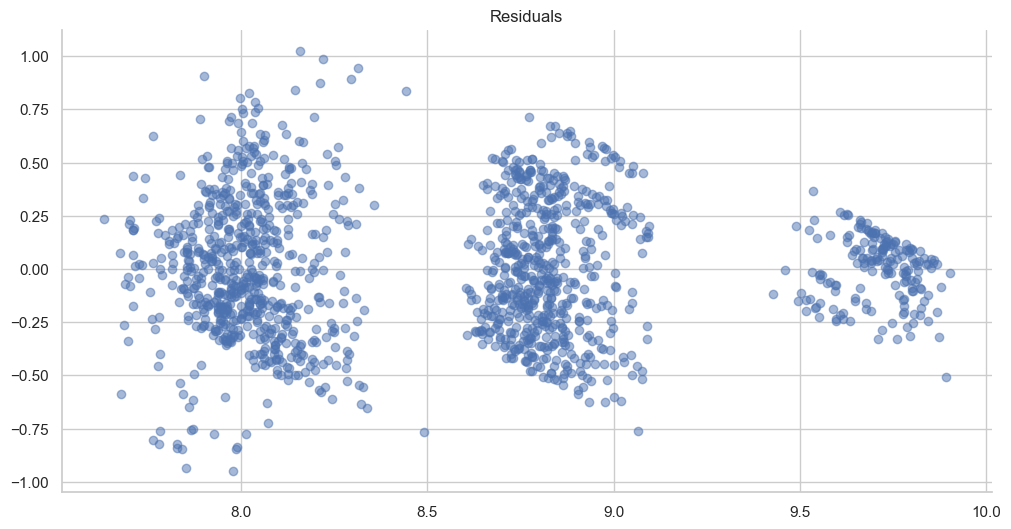

In [84]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df.predictions3, y=df.residuals3, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

The plot shows a violation of the homoscedasticity assumption as the resiudals appear in a non-random pattern. However, we used HC3 to minimise this problem. 

#### 4.4.3 Normality of residuals

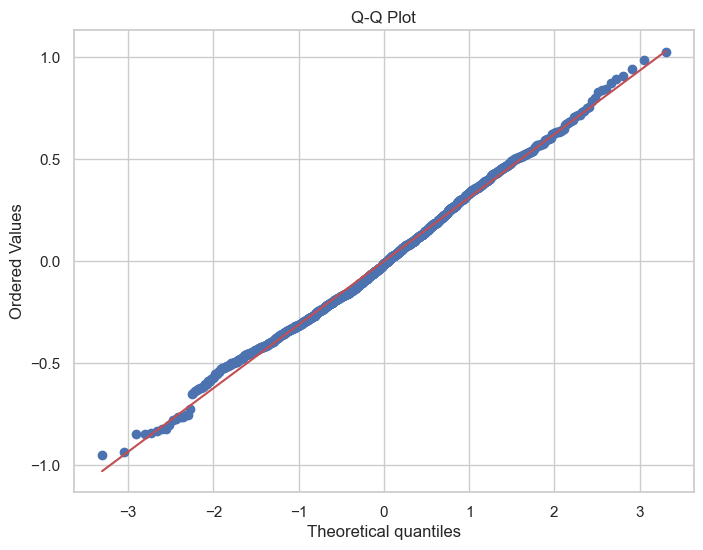

In [85]:
# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(df['residuals3'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

Similar to the output for the first model the residuals seem to be normally distributed along a straight line. 

#### 4.4.4 Multicollinearity  

In [86]:
# Create a dataframe of independent variables
X = results3.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results3.model.exog_names

print(vif)

    VIF Factor                             features
0   128.291496                            Intercept
1     1.358541           JobRole[T.Human Resources]
2     2.525810     JobRole[T.Laboratory Technician]
3     1.706749                   JobRole[T.Manager]
4     1.908117    JobRole[T.Manufacturing Director]
5     1.539373         JobRole[T.Research Director]
6     2.662676        JobRole[T.Research Scientist]
7     2.739574           JobRole[T.Sales Executive]
8     1.619851      JobRole[T.Sales Representative]
9     2.328334  BusinessTravel[T.Travel_Frequently]
10    2.323643      BusinessTravel[T.Travel_Rarely]
11    1.014413                       Gender[T.Male]
12    1.277810                                  Age
13    1.054944                            Education
14    1.006283                    PerformanceRating


There is no problem of multicollinearity as all factors are below the critical threshold of 5. 

#### 4.4.5 Independence of Errors (autocorrelation of errors)  

In [87]:
# Perform the Durbin-Watson test
dw_test = durbin_watson(df['residuals3'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.0468600155234986


The Durbin-Watson Test indicates no evidence of  correlation in residuals as the value is between 1.5 and 2.5. 

#### 4.4.6 Conclusion

To summarise, our initial OLS diagnostics indicated violations of linearity and homoscedasticity even after log-transforming MonthlyIncome. We therefore report OLS estimates with heteroskedasticity-consistent standard errors (HC3). However, since linearity is also violated we must be careful with the interpretation of the model.

This issue persists because job role is a strong predictor of monthly income and is most likely organised in ranks. For example, if an employee is promoted their pay most likely increases by a specific amount that is common for the company. To reduce these issues we removed the variable role for the next model. Since, the log has improved our models before we we continue to use the log transformation. 

## Findings

Given the large sample and robust errors the derived analysis for model 2 can be used in HR related fields such as compensation analysis. However, due to potential limitations of the linearity assumption all coefficients and the general capability of explaining the variance of Monthly Income should be considered cautiously. 

Using the second model we can reject the null hypothesis and argue that keeping everything else constant high travel frequency has a positive effect on Monthly Income. Also noteworthy, Job Roles and age also have a positive effect on income. Implying that older people tend to earn more than younger people even in the same role. 

Future research possibilities include finding interaction terms that meet the linearity assumption.

# Method 2 

## Two-sample one sided t-test

The next section uses a two sample t-test to test the following assumption. 

H2: Lower distance from home has a positive effect on monthly income. 

In [88]:
# Splitting the distance from home variable into two groups based on the median value to create a binary variable Dist_high (1 if above median, 0 if below median).
median_dist = df['DistanceFromHome'].median()
df['Dist_high'] = (df['DistanceFromHome'] > median_dist).astype(int)

# 2. prepare groups (using MonthlyIncome_log; change column if needed)
group_low = df.loc[df['Dist_high'] == 0, 'MonthlyIncome'].dropna()
group_high = df.loc[df['Dist_high'] == 1, 'MonthlyIncome'].dropna()

In [89]:
# Count the values in the 'Dist_high' column
dist_high_counts = df['Dist_high'].value_counts()
print(dist_high_counts)

Dist_high
0    775
1    695
Name: count, dtype: int64


In [90]:
# 2. Identify both samples 
sample_distance_high = df[df['Dist_high']== 1]
sample_distance_low = df[df['Dist_high']==0]


sample_mean_h = sample_distance_high.MonthlyIncome.mean()
sample_mean_l = sample_distance_low.MonthlyIncome.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_distance_high.MonthlyIncome, sample_distance_low.MonthlyIncome, alternative="less")
# 4. Print results

print(f"Sample Mean High: {sample_mean_h:.2f}")
print(f"Sample Mean Low: {sample_mean_l:.2f}")

# One-sided less
print("\nOne-Sided Test (High Distance Mean < Low Distance Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")



Sample Mean High: 6286.14
Sample Mean Low: 6697.34

One-Sided Test (High Distance Mean < Low Distance Mean):
t-statistic greater: -1.67
p-value greater: 0.0473


The t-test is statistically significant at a five percent confidence level as the p-value < .05. This implies that the high distance from home group has a lower mean than the lows distance group. People who live closer to their work tend to have a higher Monthly Income. 

## Assumptions of the test


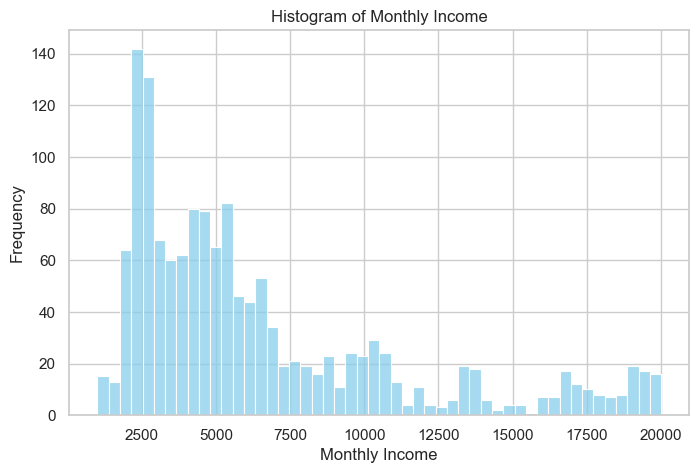

In [91]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], bins=50, kde=False, color='skyblue')
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

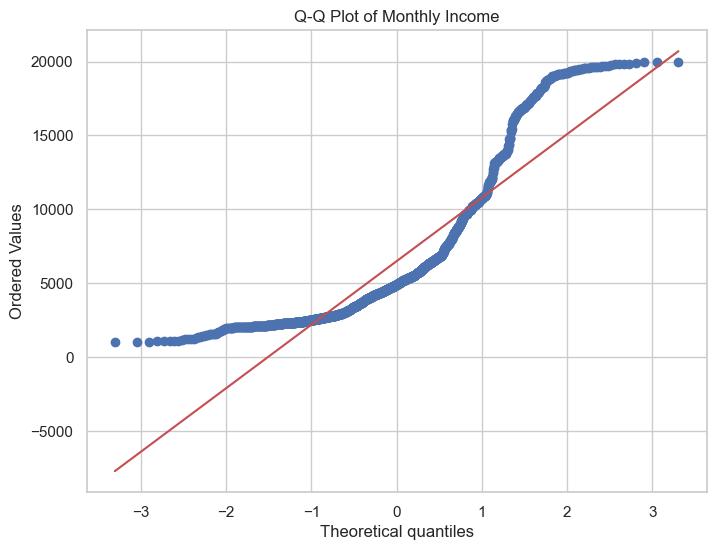

In [92]:
# Q-Q plot for MonthlyIncome to assess normality
plt.figure(figsize=(8, 6))
stats.probplot(df['MonthlyIncome'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Monthly Income')
plt.show()

Altough the variable Monthly Income suffers from non-normality the Central Limit Theorem applies. The sample size is large enough to assume that the test is valid. 

In [93]:

stat_levene, p_levene = levene(group_low, group_high)
print(f"Levene's test statistic: {stat_levene:.4f}, p-value: {p_levene:.4g}")

Levene's test statistic: 6.1601, p-value: 0.01318


Since Levene's test highlights unequal variances we used the welch test. 

In [94]:


# Welch's t-test (unequal variances)
t_statistic_welch, p_value_welch = ttest_ind(group_high, group_low, equal_var=False, alternative="less")
print(f"Welch's t-test statistic: {t_statistic_welch:.4f}, p-value: {p_value_welch:.4g}")

Welch's t-test statistic: -1.6853, p-value: 0.04607


The Welch t-test shows a similar output as above. We can reject the null hypothesis (p-value < .05). Therefore, employees who live cloeser to the office tend to have a higher income

# 6. Reflection on the use of AI

AI reflection 

This section provides a detailed and critical reflection on the strategic integration of generative AI tools in this project. The aim is to highlight the tasks for which AI was used as an accelerator but also assess the limitations. This allows us to clearly establish the unique contributions that were made by the team. 

AI Tools and Scope
We primarily used two categories of AI models, for different tasks. The first were generative large language models (LLMs) to help with conceptual framing such as coming up with a noble research question and testable hypothesis. Furthermore, the LLMs were used to build templates for data cleaning, assumption checks and explaining outputs. We first gave an initial prompt explaining the task assigned a persona, i.e. “Python expert” to the LLM and provided the file. This reduced the effort for every following prompt. The AI was especially useful during the exploratory analysis because we needed to gain an overview of all columns. To find any missing values we asked AI to generate an output with all missing values. The following prompt was sufficient to come up with an easy-to-read analysis of missing values. “Give me the code to check missing values for all columns. Make the output easy-to-read and visually appealing. Secondly, we used the LLM to analyse the output. For example, we uploaded the output of the linear regression to verify that our interpretation is correct. The following prompt served as a template. “Pretend you are a professor for a master’s course called Research Methods for Business Analytics, and you have experience in the field of data science. Analyse the following output for my project.” 

The second AI tool were coding assistants for example inline code-completion. We mainly used this to help with code generation. Here the focus was on increasing efficiency by using features such as the auto-complete which allows the user to complete a line of code with low effort. Additionally, since the coding assistant is constantly running it is useful for debugging. Debugging was important to identify and suggest corrections. 

The intention of using these AI tools was not to generate the final deliverable, but to automate repetitive processes, detecting errors and brainstorming, which allowed the team to allocate more resources to critical analysis. All AI-generated code was adapted to the content provided in the course exercises to ensure full alignment with the content. 

Benefits and Limitations
The use of AI significantly increased efficiency. The time required for code generation was decreased which allowed us to improve model building and faster assumption checking. Additionally, AI helped to overcome small syntax issues in the code which saved significant amount of time. 

On the other hand, AI produced output without checking the assumptions. It used provided takeaways and only pointed out at the end that some assumptions might be violated. Since AI does not understand the content but simply uses probabilities to come up with a response it is crucial to validate the content.


Human contributions beyond AI
The team used the inspiration of the LLM to come up with the research question and the derived hypothesis. Additionally, we created a graphic to understand the interactions between the hypothesised interactions between the variables. We also selected the two analytical methods and ensure that these are able to answer the hypothesis. All interpretations and insights were produced by the team but compared to an LLM. 

To summarise, AI was used as a starting point and then refined by the team to match the course content and validate all outputs. 


# 7. Conclusion

# 8. References

Kent, A. (2025). Annual Study reveals complexity of business travel in 2025. SAP Concur. https://www.concur.co.uk/blog/article/annual-study-reveals-complexity-business-travel-in-2025?&cookie_preferences=complete
Josse Delfgaauw, Dur, R., Oke Onemu, & Sol, J. (2020). Team incentives, social cohesion, and performance: A natural field experiment (No. 13498). Institute of Labor Economics (IZA). https://hdl.handle.net/10419/223940